In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [21]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [75]:
df=pd.read_csv("dpc-covid19-ita-andamento-nazionale.csv")




'2020-10-01T17:00:00'

In [30]:
tp= df.tamponi[1:]
tp.index=range(0,241)

tp= tp-df.tamponi
tp[0]=0
tp[241]= df.tamponi[241-240]


17543.585880679915

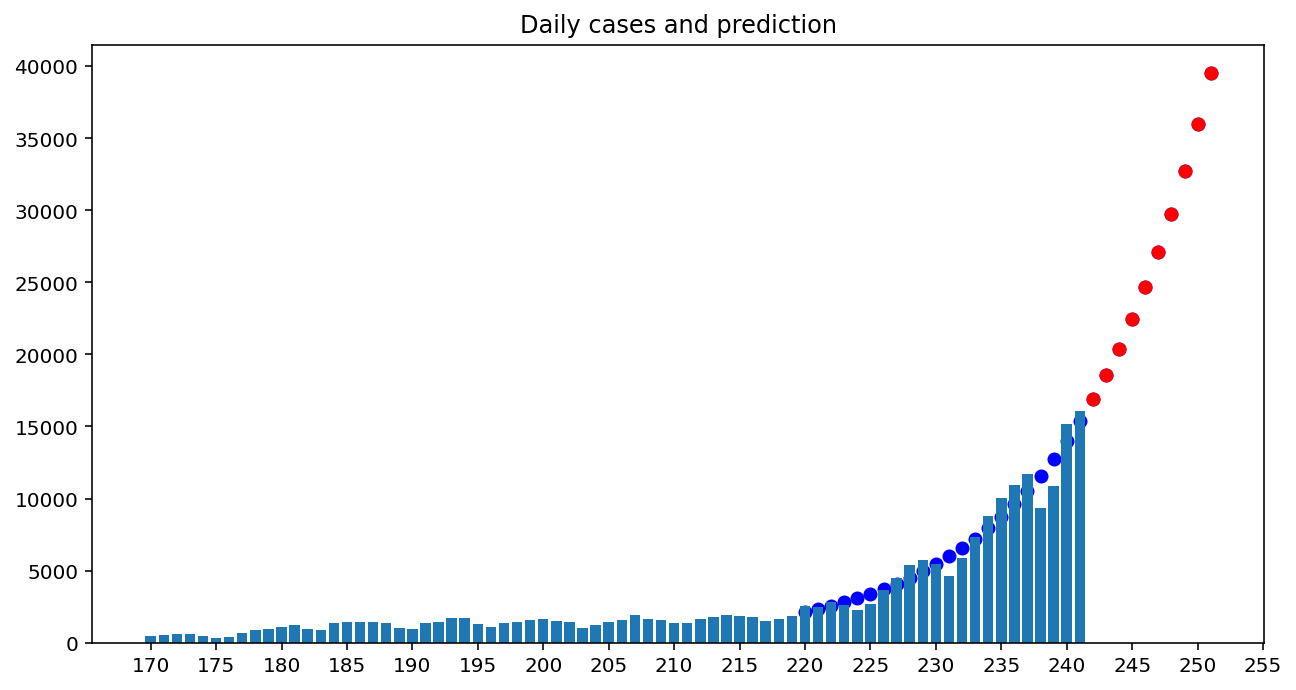

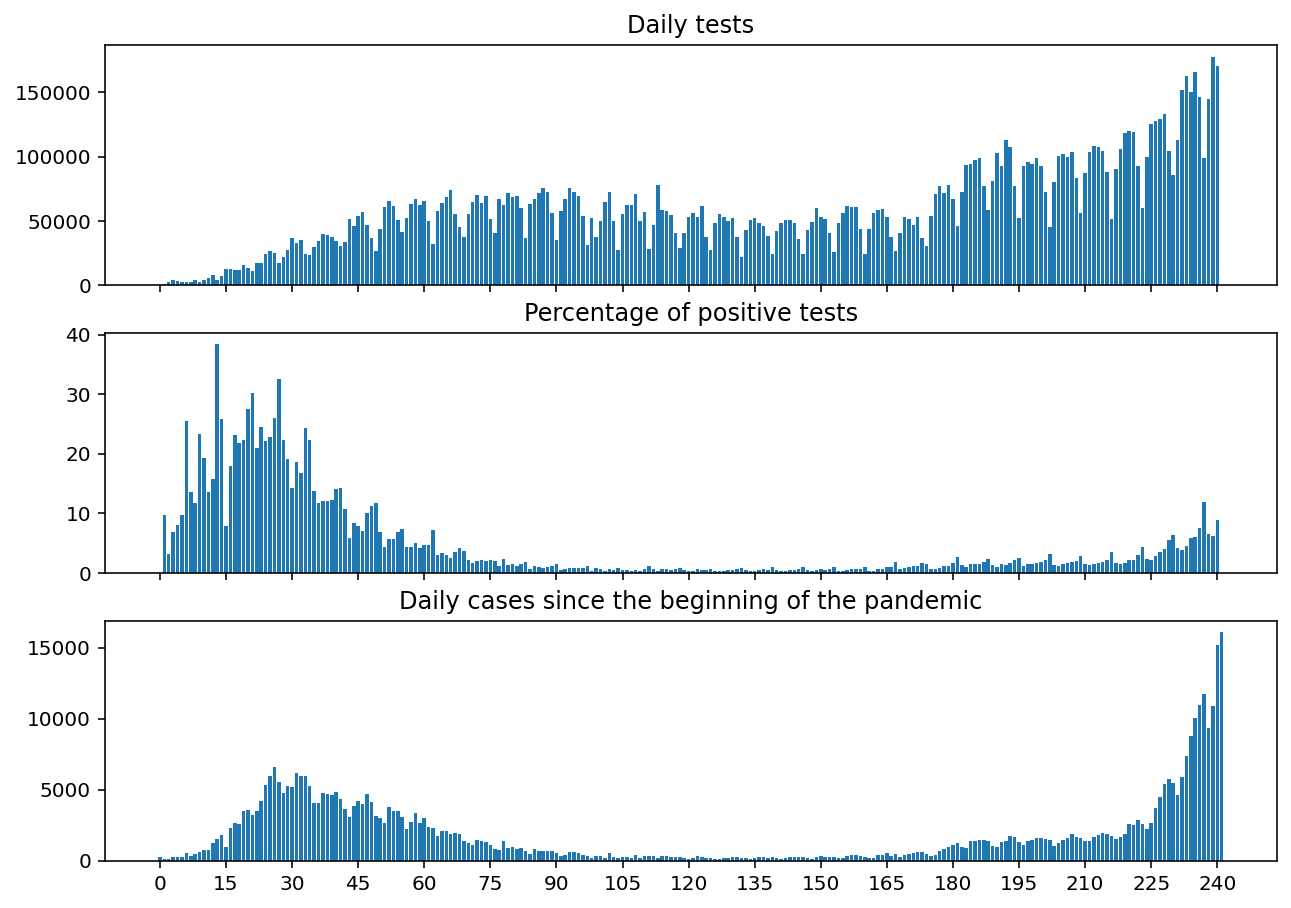

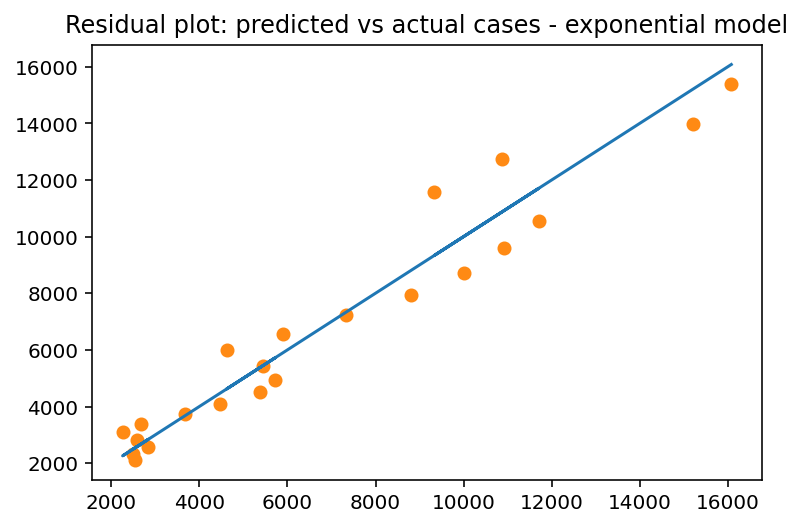

In [78]:
def projections(df,interval, days_pred):   
        
    '''MACHINE LEARNING PART WITH SCI-KIT LEARN '''
    '''MACHINE LEARNING PART WITH SCI-KIT LEARN '''
    Y_train= df.iloc[interval[0]:interval[1]].nuovi_positivi.values 
    Y_train= np.log(Y_train) # to make it "fittable" with linear regression 
    'X used to train:'
    
    X_train=np.array(range(0,interval[1]-interval[0]))
    X_train=X_train.reshape(-1, 1)

    linear=LinearRegression()
    model=linear.fit(X_train,Y_train) 
   
    'X used to predict:'
    
    X_pred= np.array(range(0,interval[1]-interval[0]+days_pred))
    X_pred= X_pred.reshape(-1, 1)
    
    'predictions:'
    
    pred= model.predict(X_pred) 
    
    pred= np.exp(pred) 
    
    ''' END OF THE MACHINE LEARNING PART '''
    ''' END OF THE MACHINE LEARNING PART '''
    
    fig, ax1 = plt.subplots(1, )
    
    fig.set_size_inches(10.5, 5.5, forward=True)
    
    ax1.title.set_text('Daily cases and prediction')
    ax1.bar(np.array(range(170,interval[1])),df.nuovi_positivi[170:interval[1]] )
    ax1.set_xticks(range(170,interval[1]+days_pred+60,5))
    
    
    ax1.scatter(np.array(range(interval[0],interval[1]+days_pred)),pred ,color='blue')
    ax1.scatter(np.array(range(interval[1],interval[1]+days_pred)),pred[interval[1]-interval[0]:] ,color='red')
    #ax1.set_xticks(range(0,interval[1]+days_pred,15))  #delete the "#" to activate this line and display the graph with different xtick
    
    fig, (ax3,ax4,ax5) = plt.subplots(3, sharex=True)
    fig.set_size_inches(10.5, 7.5, forward=True)
    
   
    
    
    residual= pred[:interval[1]-interval[0]] - df.nuovi_positivi[interval[0]:interval[1]]
    residual= np.absolute(residual)
    residual= np.sum(residual)
    
    
    ax3.bar(np.array(range(0,interval[1]-1)),tp[0:interval[1]-1])
    ax3.title.set_text('Daily tests')
    ax4.bar(np.array(range(0,interval[1]-1)),df.nuovi_positivi[0:interval[1]-1]/ (tp[0:interval[1]-1]/100))
    ax4.set_xticks(range(0,interval[1],15))
    
    ax4.title.set_text('Percentage of positive tests')
    ax5.bar(np.array(range(0,interval[1])),df.nuovi_positivi[0:interval[1]] )
    ax5.title.set_text('Daily cases since the beginning of the pandemic')
    fig, ax1 = plt.subplots(1, sharex=True)
    
    #ax2.scatter(np.array(range(interval[0],interval[1])),residual, color='#ff8a14')
    
    ax1.scatter(df.nuovi_positivi[interval[0]:interval[1]],pred[:interval[1]-interval[0]], color='#ff8a14')
    ax1.plot(df.nuovi_positivi[interval[0]:interval[1]],df.nuovi_positivi[interval[0]:interval[1]])
    ax1.title.set_text('Residual plot: predicted vs actual cases - exponential model')
    #print(pred[interval[1]-interval[0]:])
    
    return residual

projections(df,[220,242],10) 


170
175
180
185
190
195
200


<ipython-input-69-842fdab330d0>:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(1, sharex=True)
<ipython-input-69-842fdab330d0>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(1, )
<ipython-input-69-842fdab330d0>:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax3,

205


<ipython-input-69-842fdab330d0>:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(1, sharex=True)
<ipython-input-69-842fdab330d0>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(1, )
<ipython-input-69-842fdab330d0>:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax3,

210


<ipython-input-69-842fdab330d0>:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(1, sharex=True)
<ipython-input-69-842fdab330d0>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(1, )
<ipython-input-69-842fdab330d0>:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax3,

215


<ipython-input-69-842fdab330d0>:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(1, sharex=True)
<ipython-input-69-842fdab330d0>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(1, )
<ipython-input-69-842fdab330d0>:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax3,

220


<ipython-input-69-842fdab330d0>:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(1, sharex=True)
<ipython-input-69-842fdab330d0>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(1, )
<ipython-input-69-842fdab330d0>:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax3,

225


<ipython-input-69-842fdab330d0>:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(1, sharex=True)
<ipython-input-69-842fdab330d0>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(1, )
<ipython-input-69-842fdab330d0>:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax3,

230


<ipython-input-69-842fdab330d0>:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots(1, sharex=True)


[73629.42310193188, 73189.51798821172, 73129.31848446662, 67971.88424716858, 59787.908334685315, 49900.15180652648, 40582.30414807336, 32151.505317516265, 23916.09342330413, 19373.145674462416, 17543.585880679915, 15165.205880621583, 12650.686888811264]


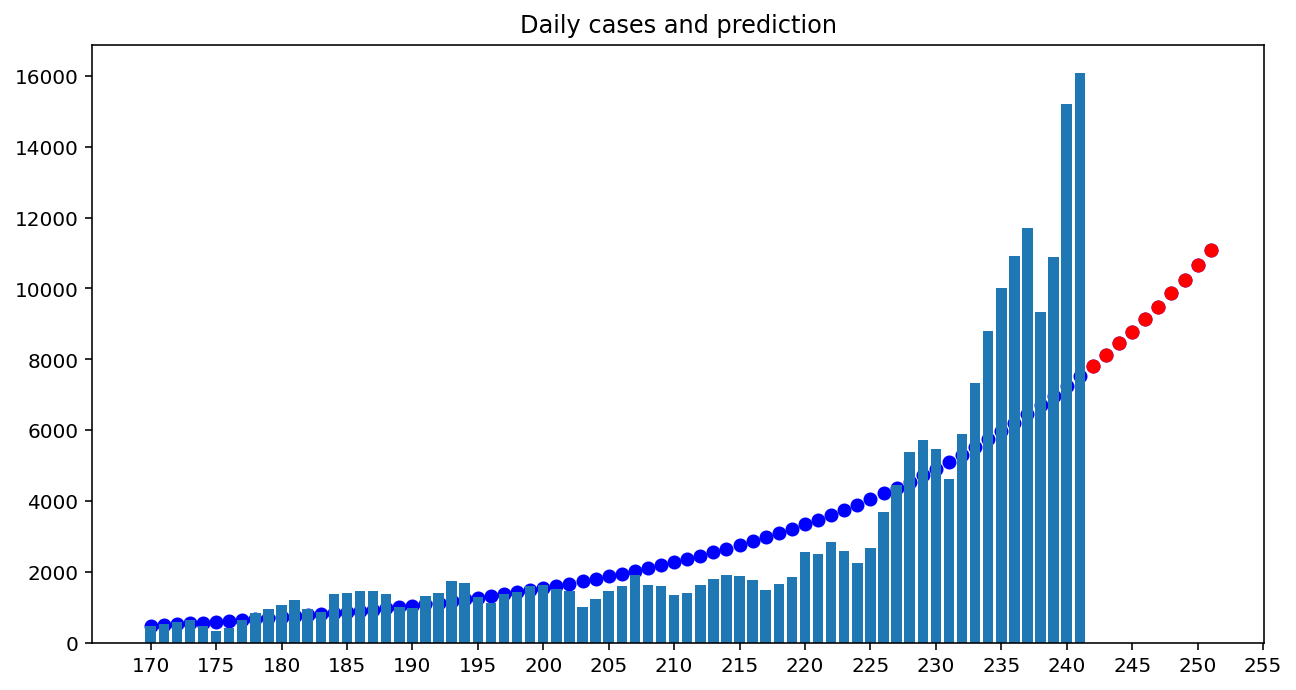

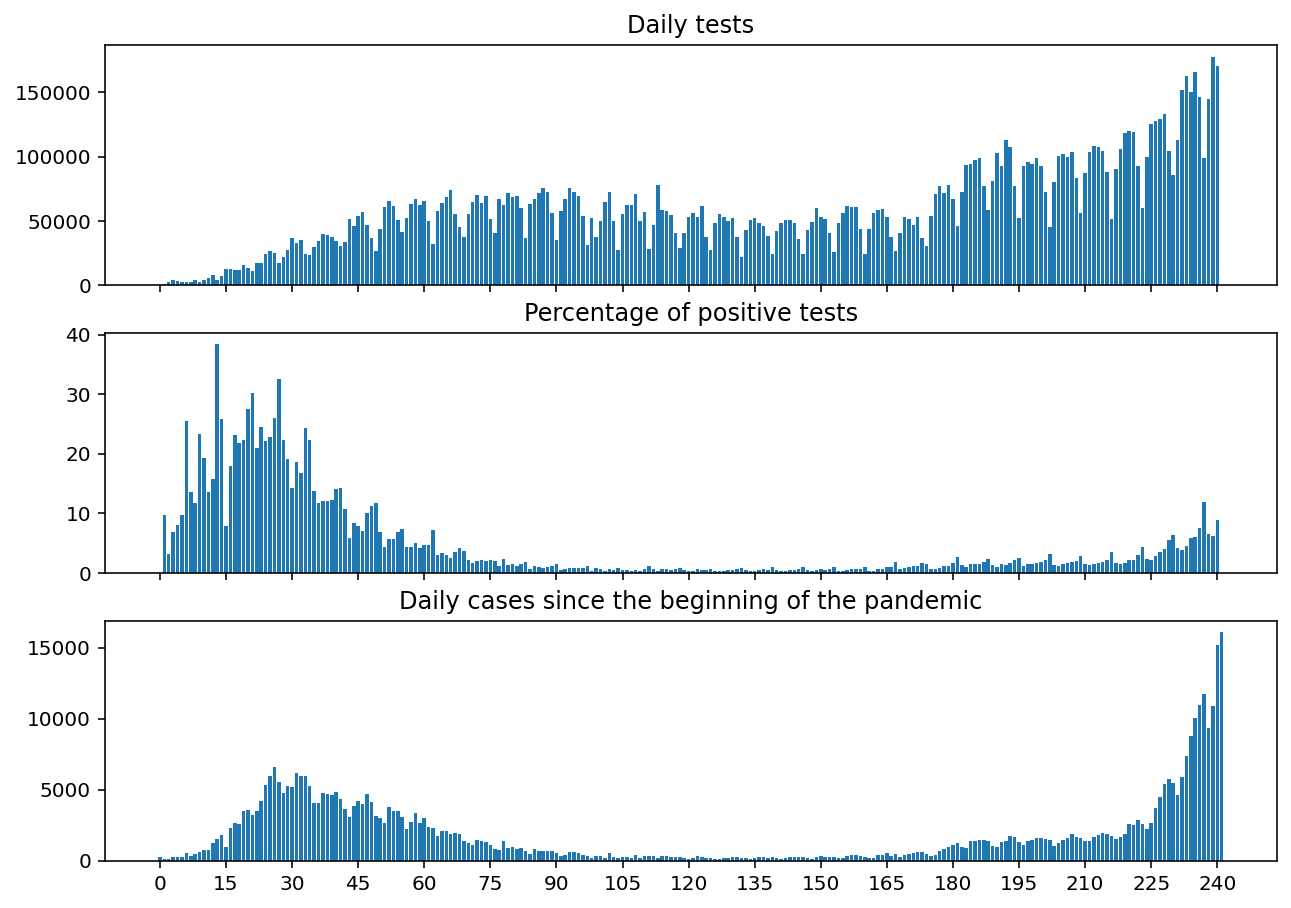

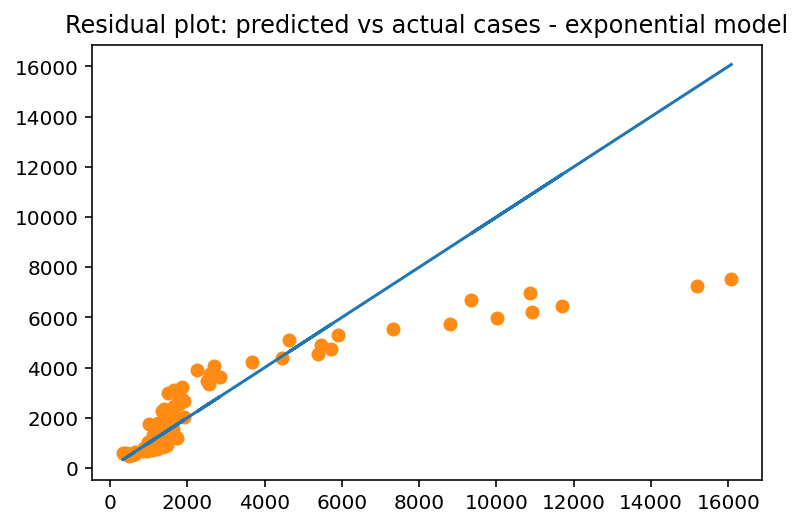

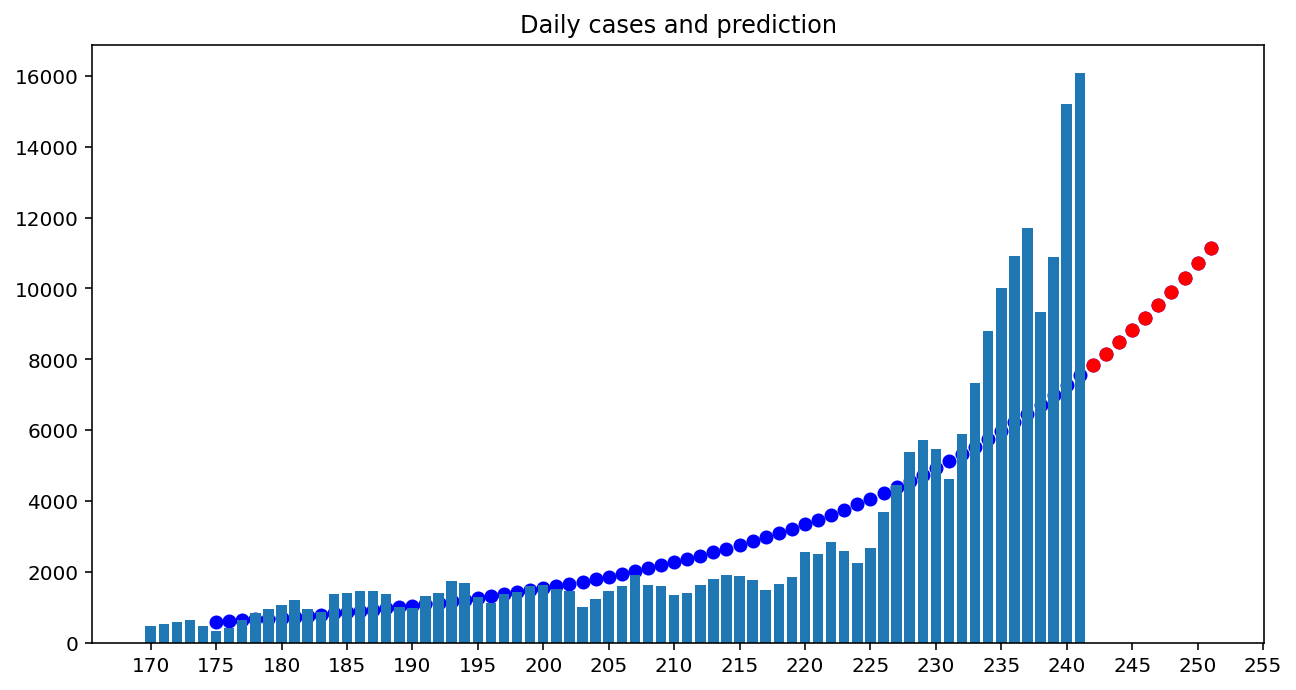

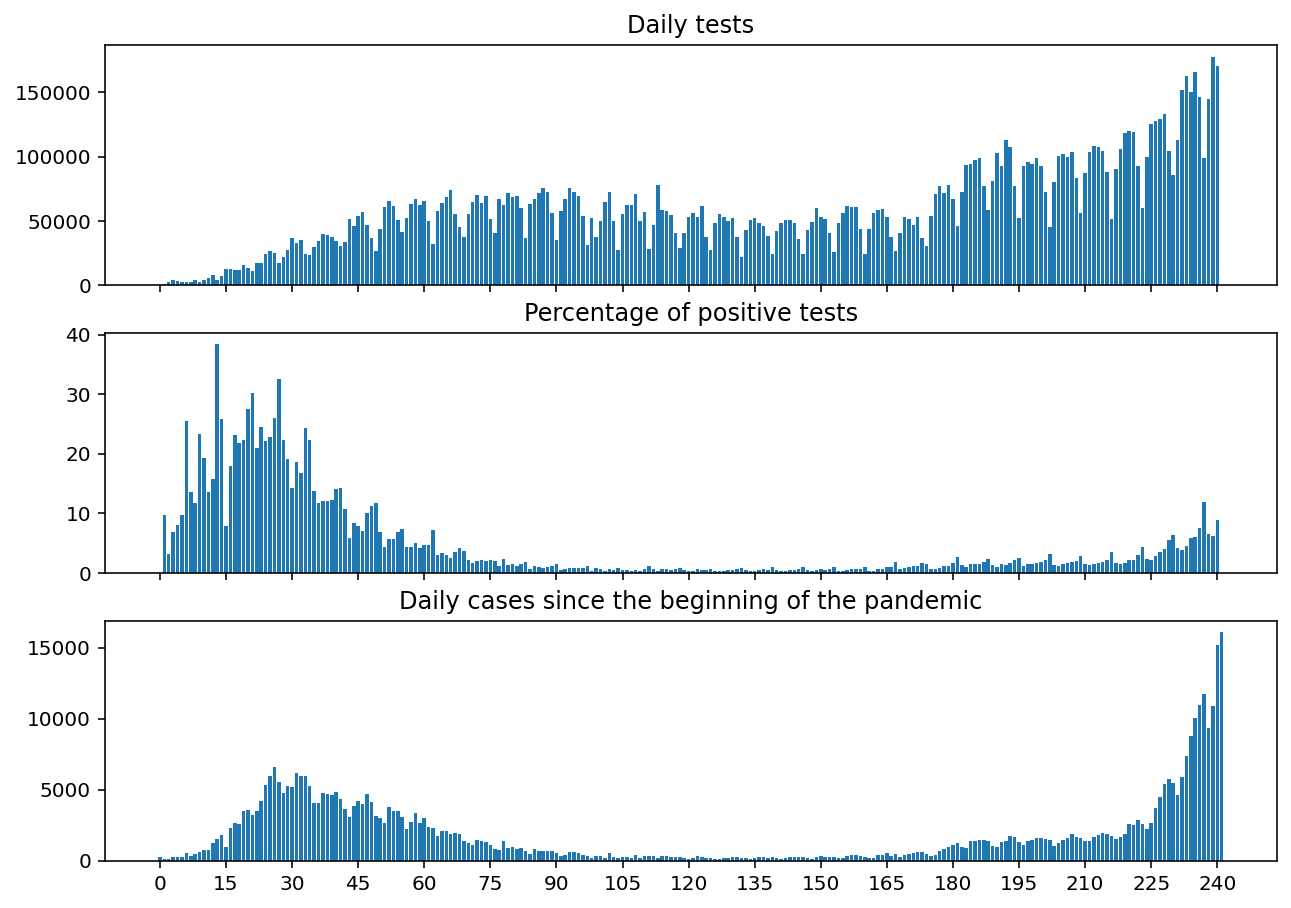

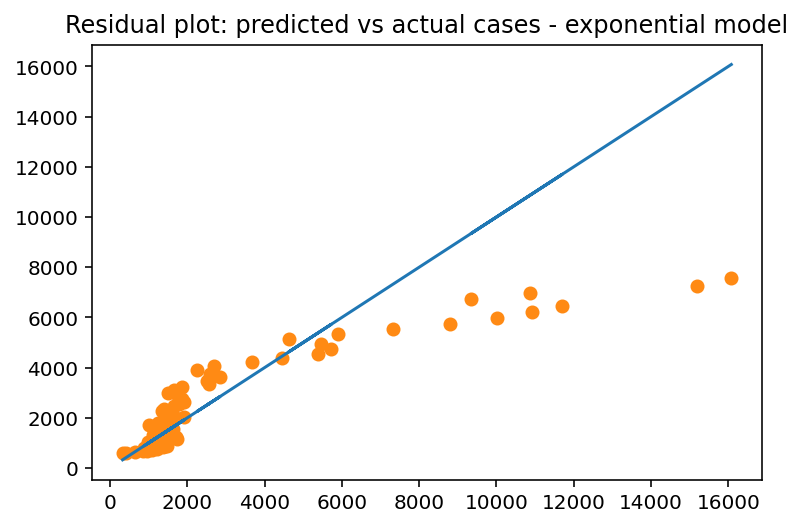

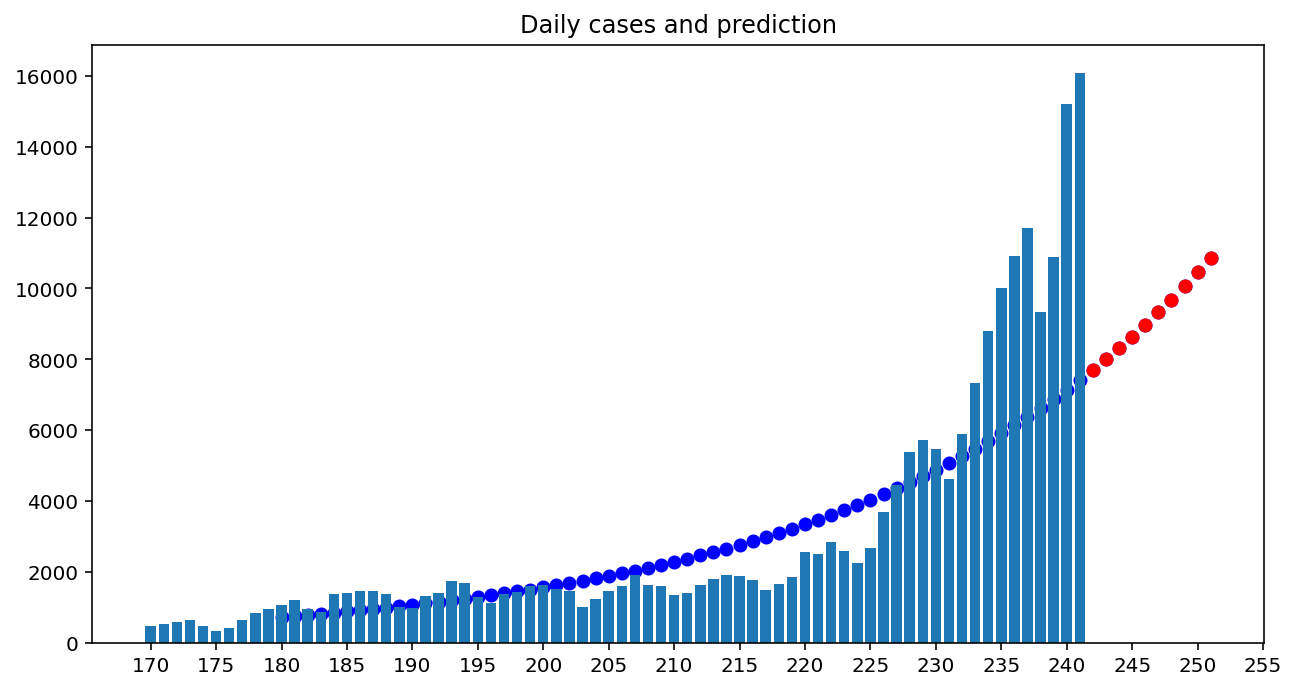

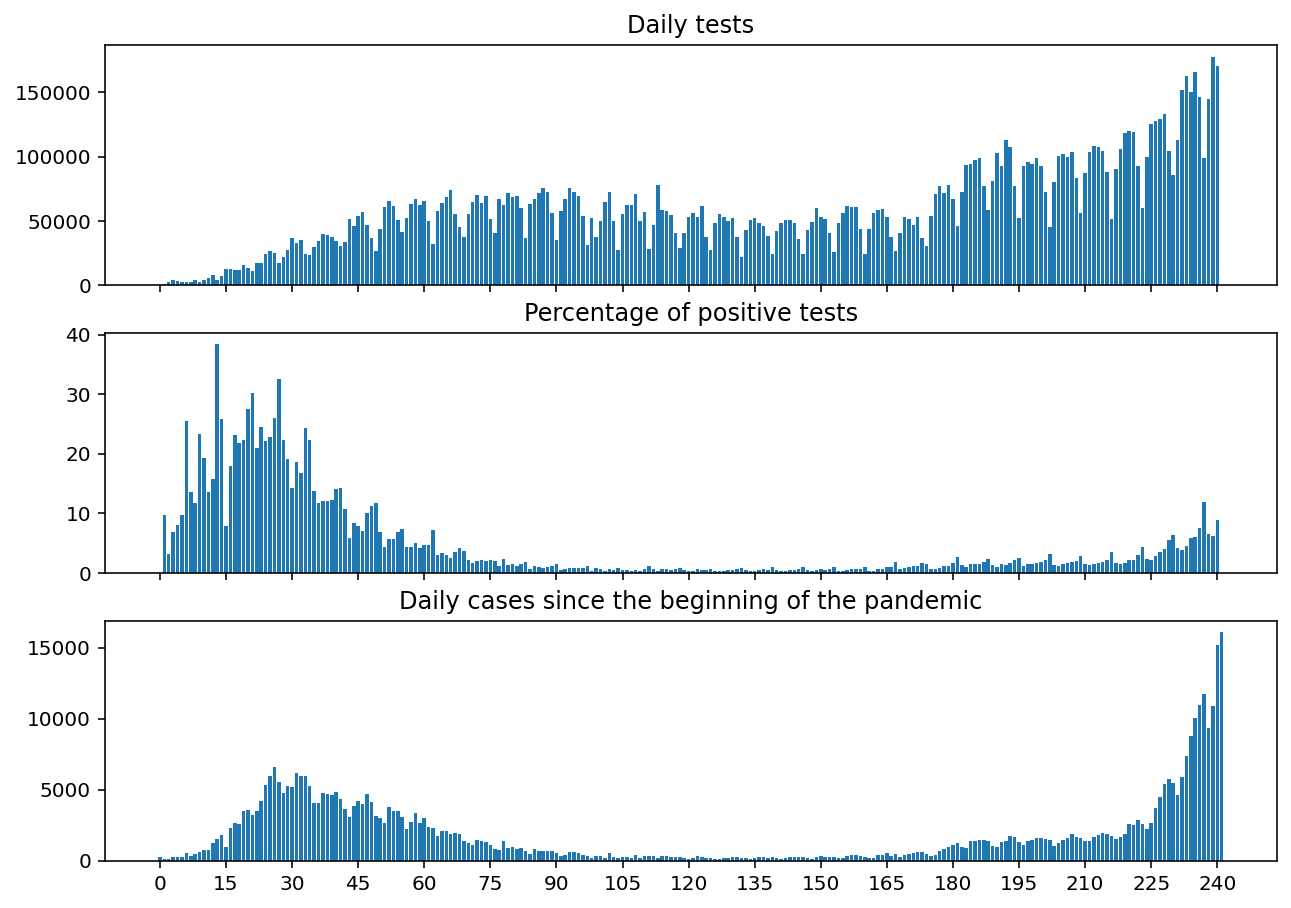

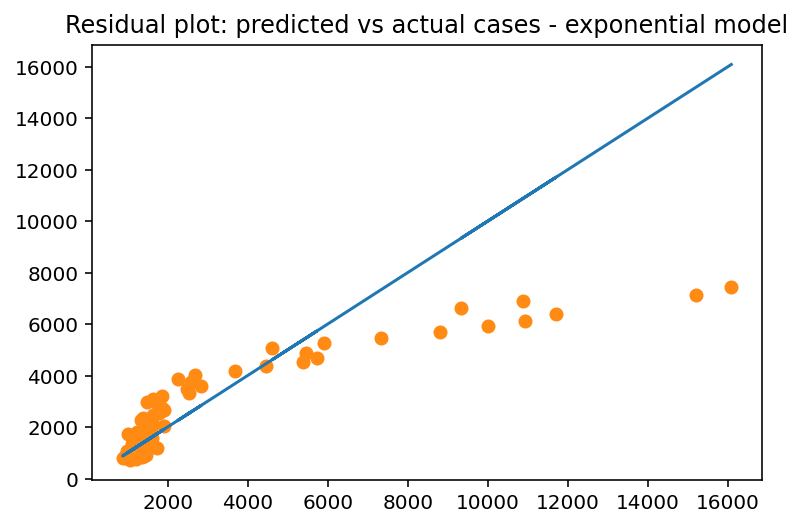

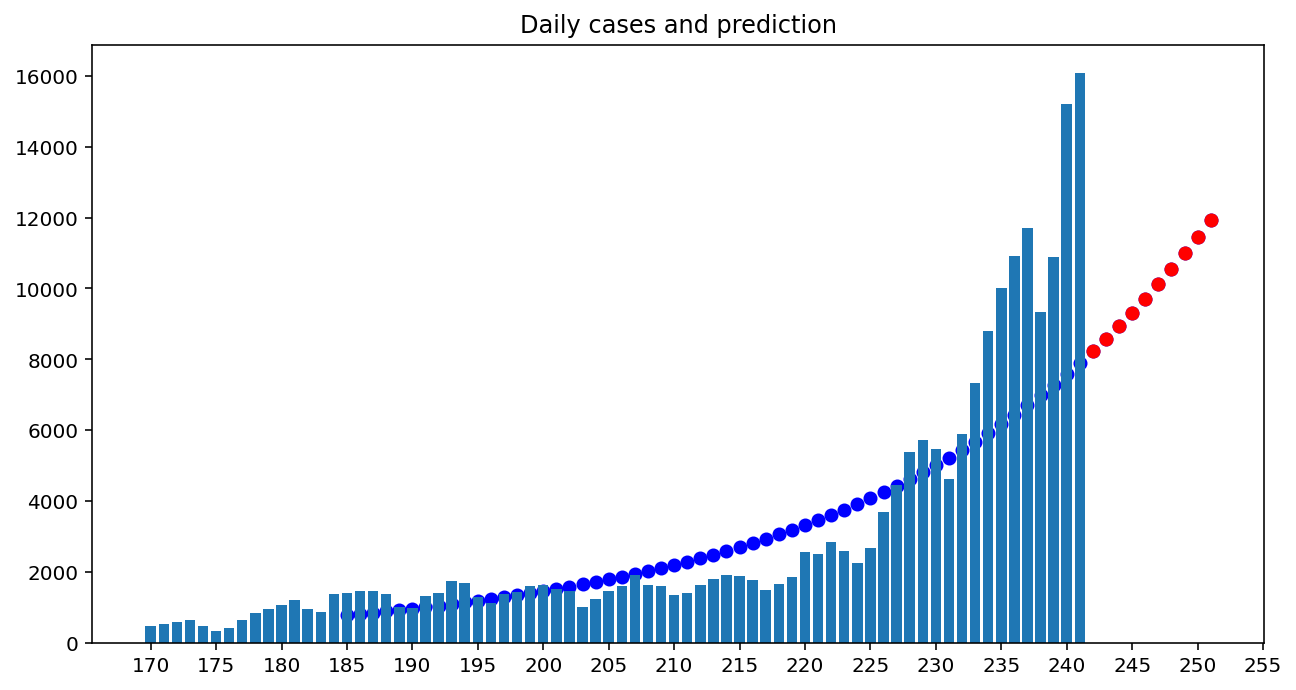

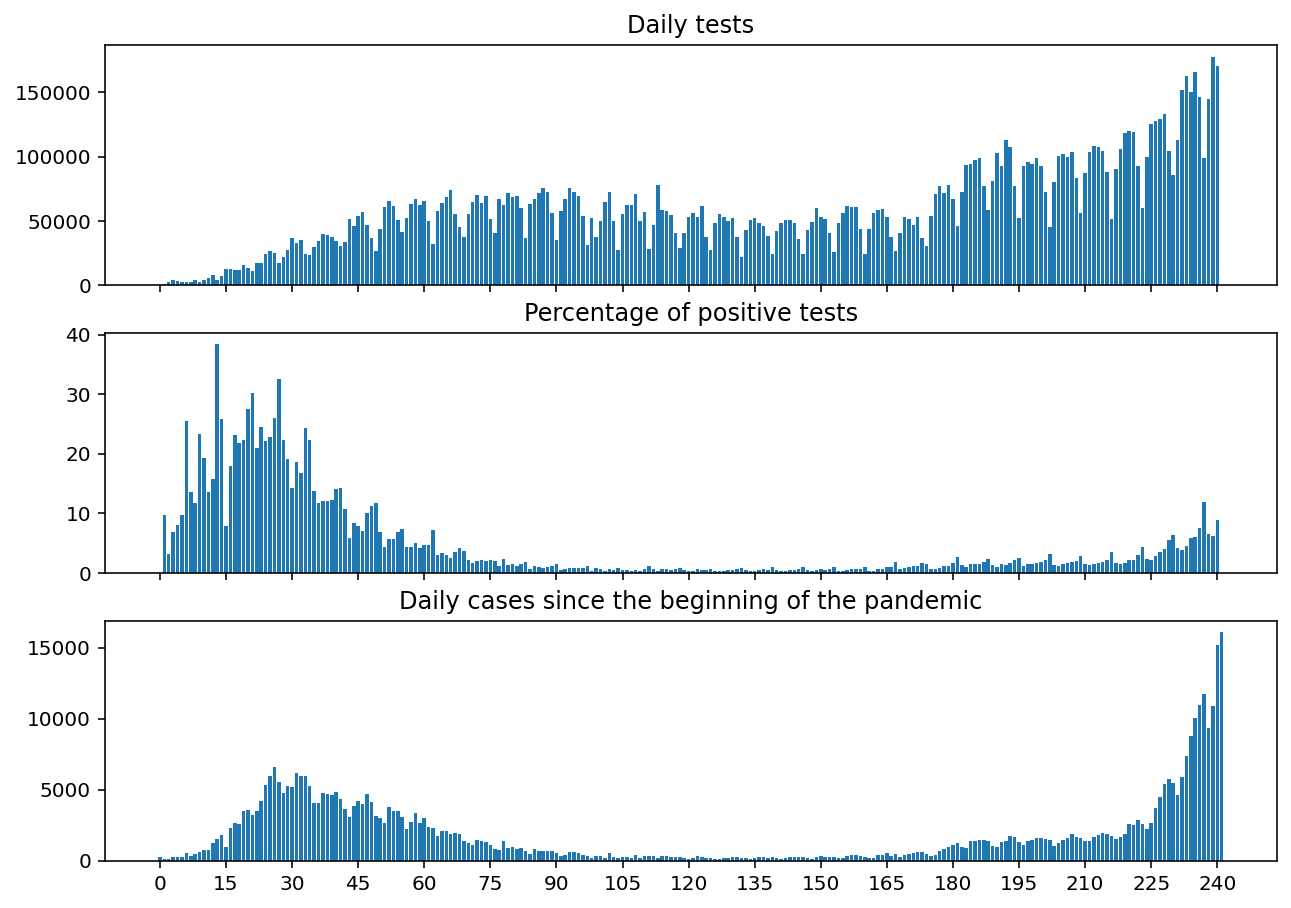

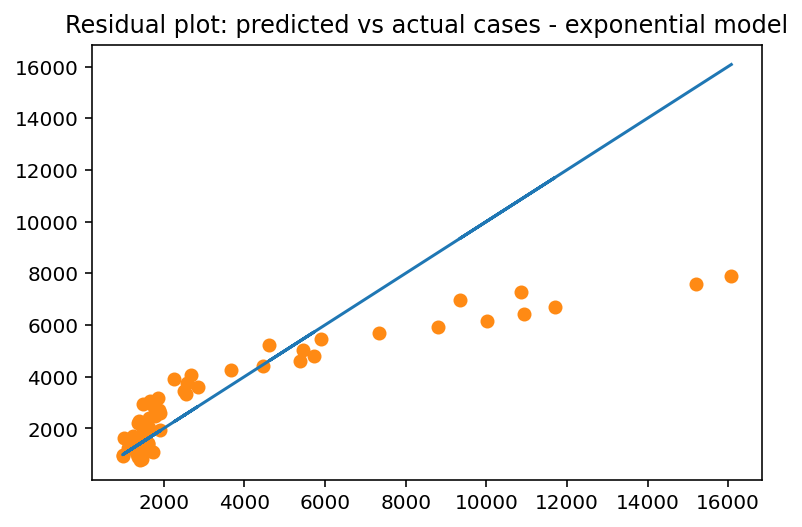

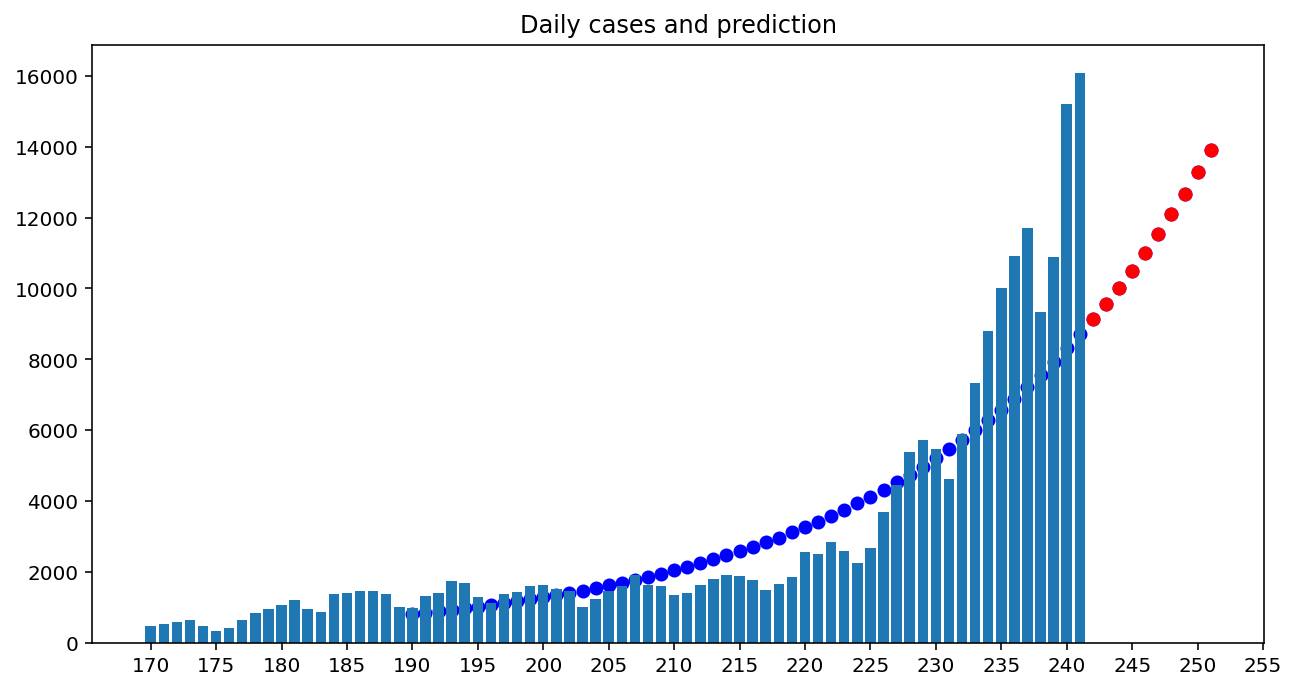

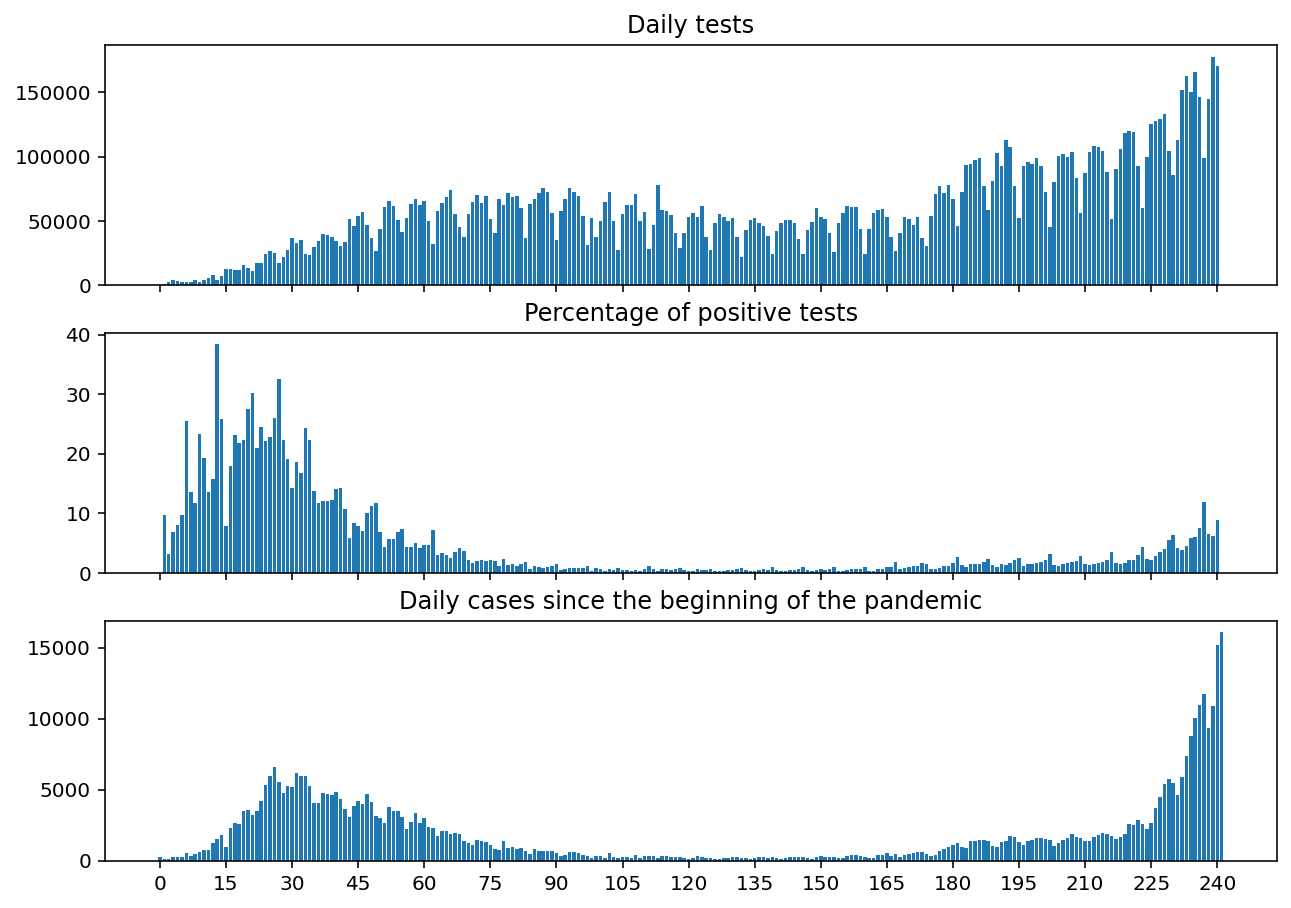

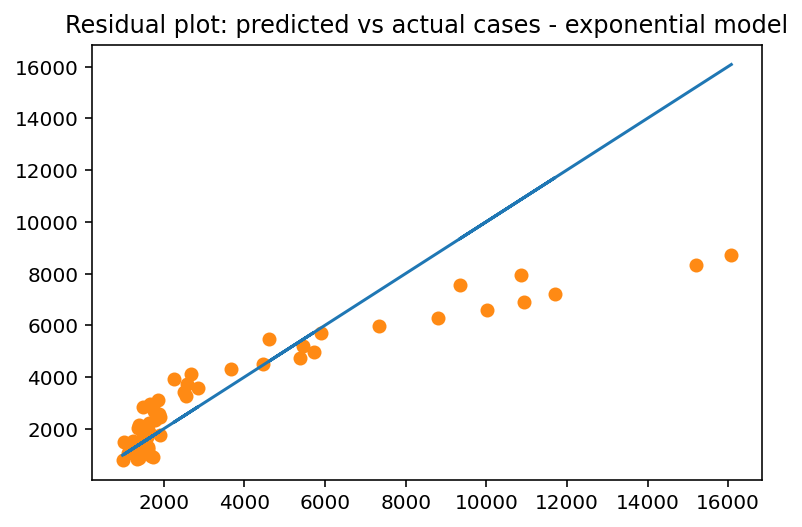

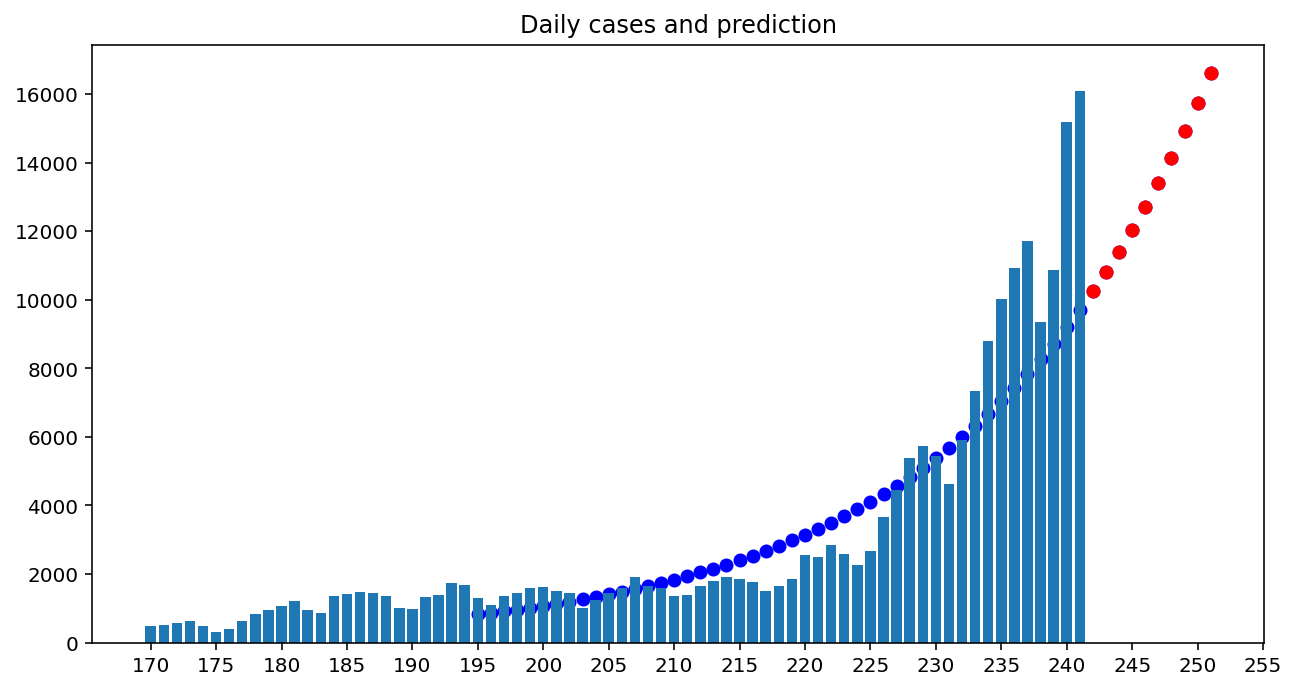

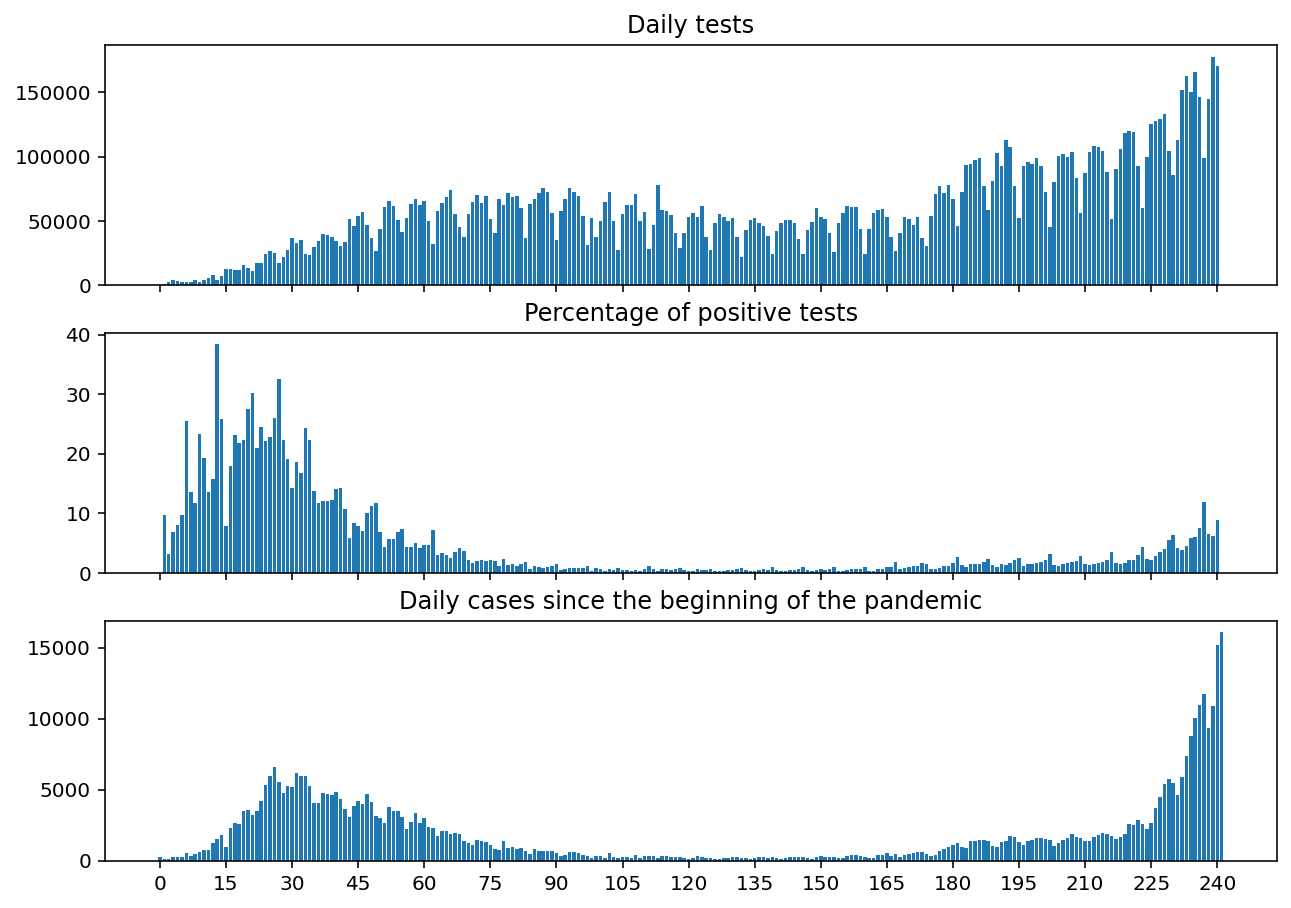

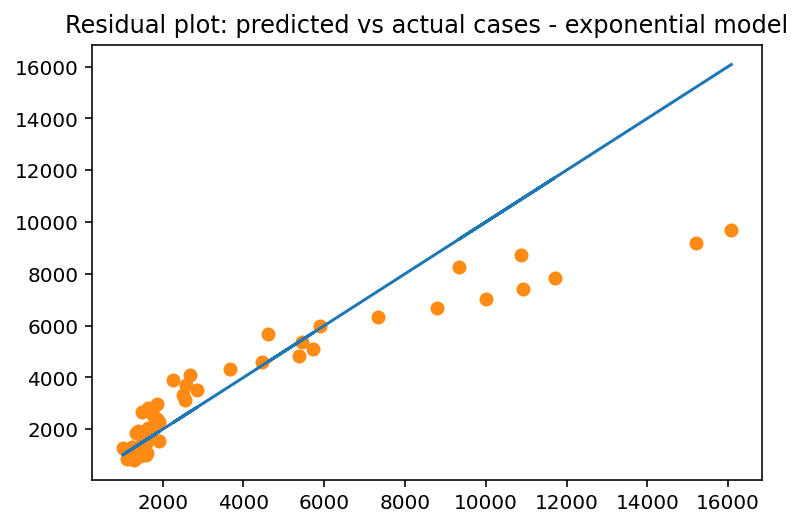

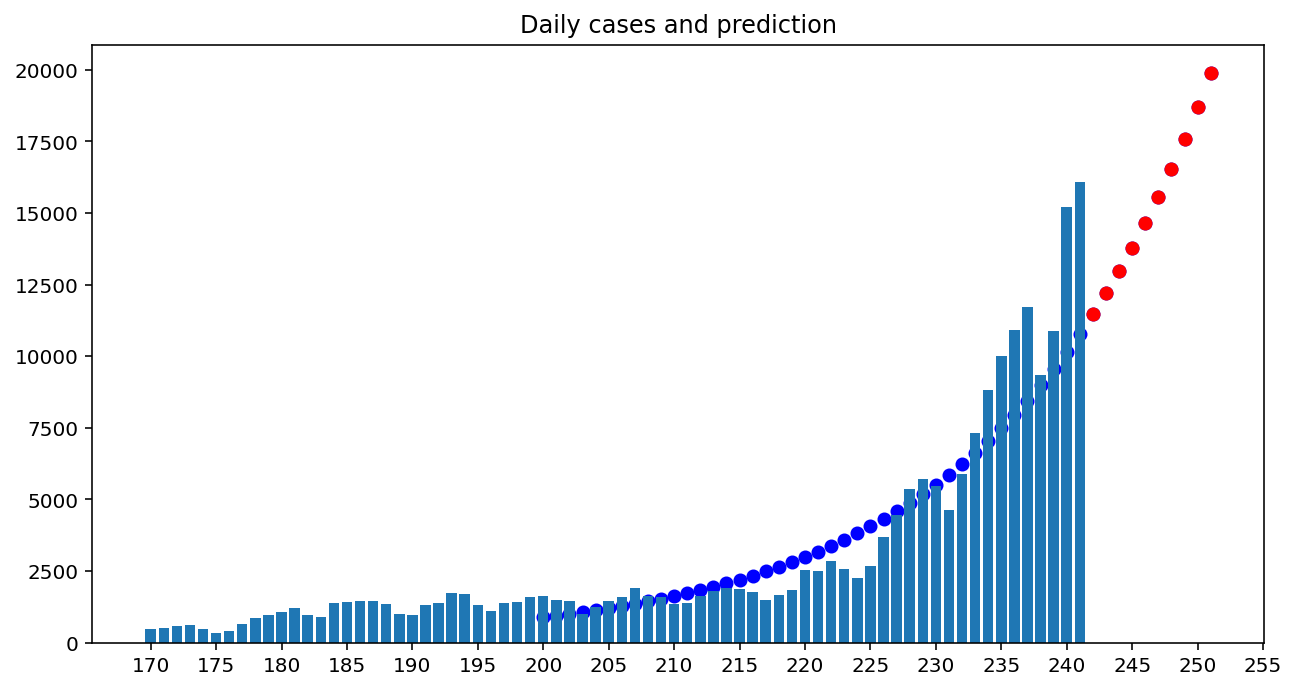

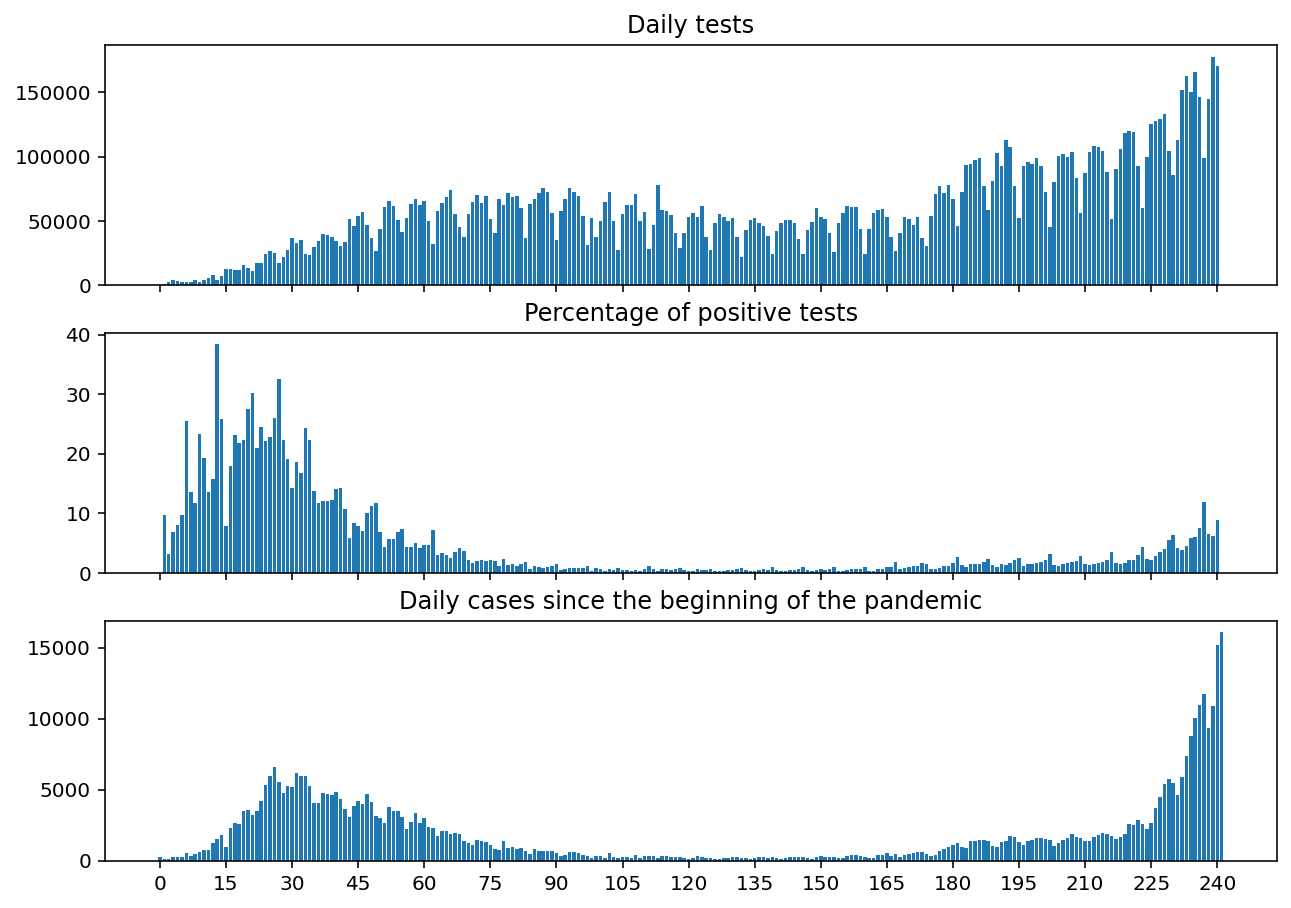

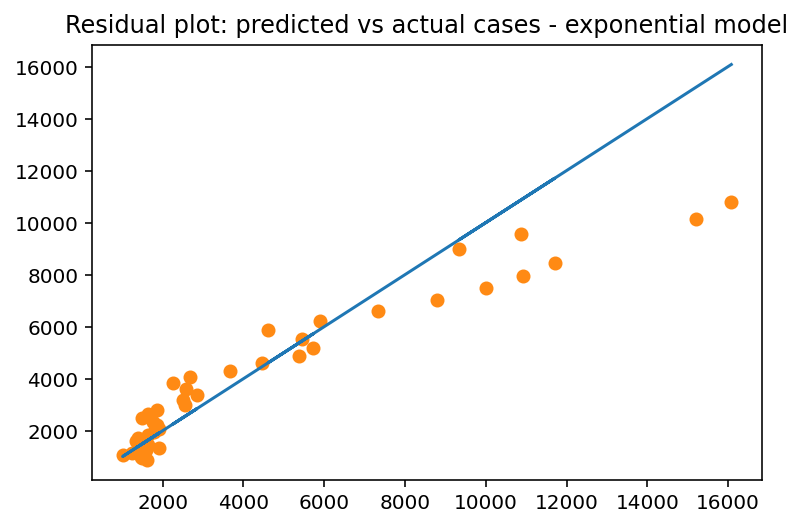

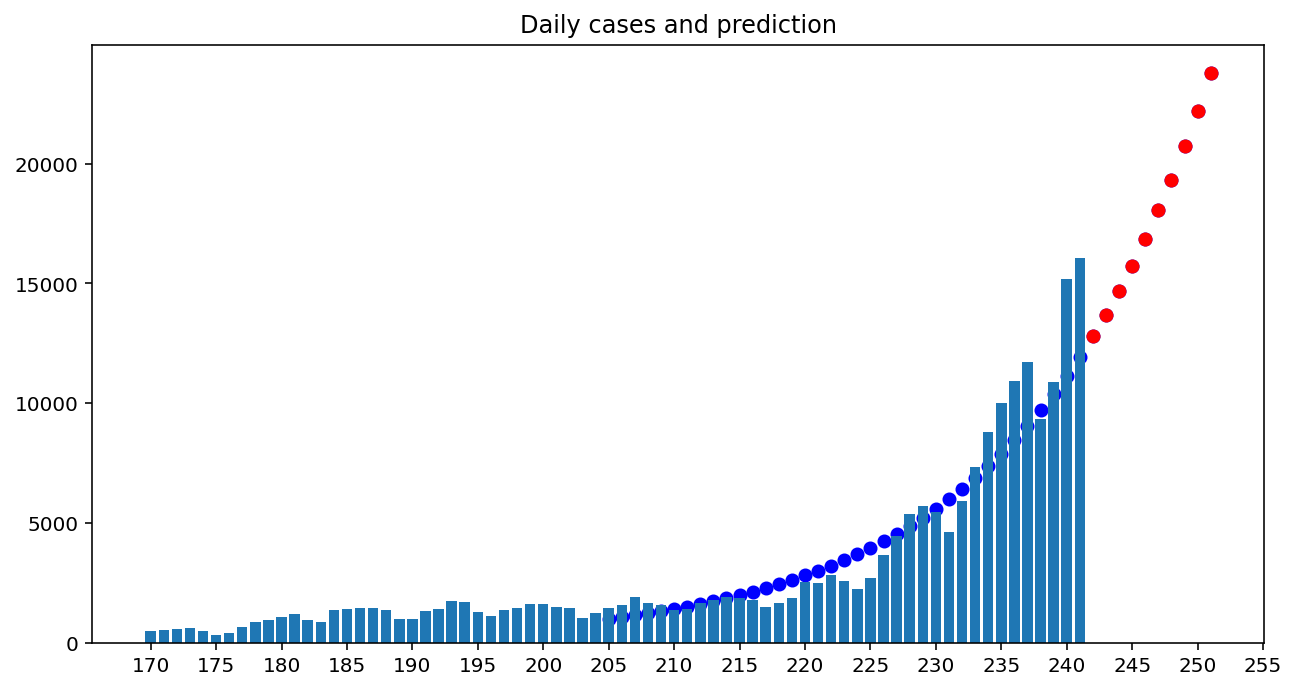

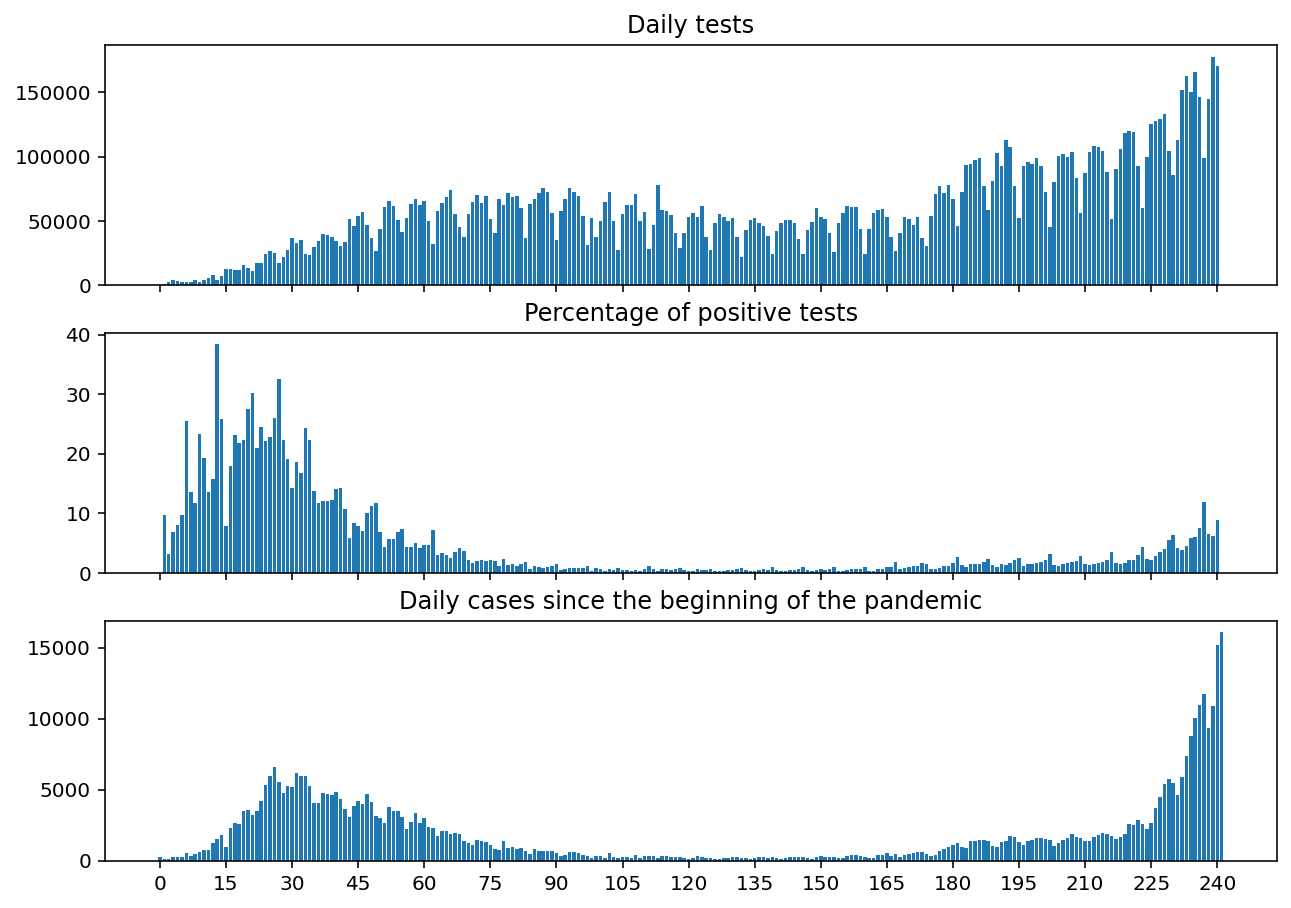

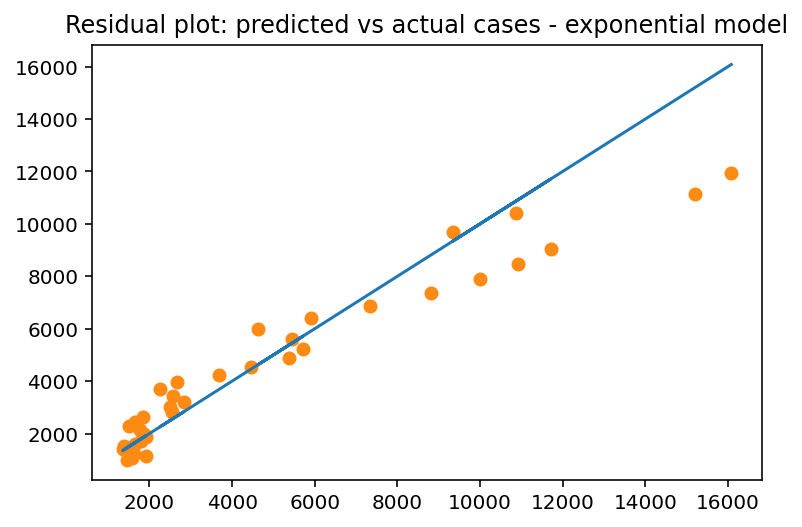

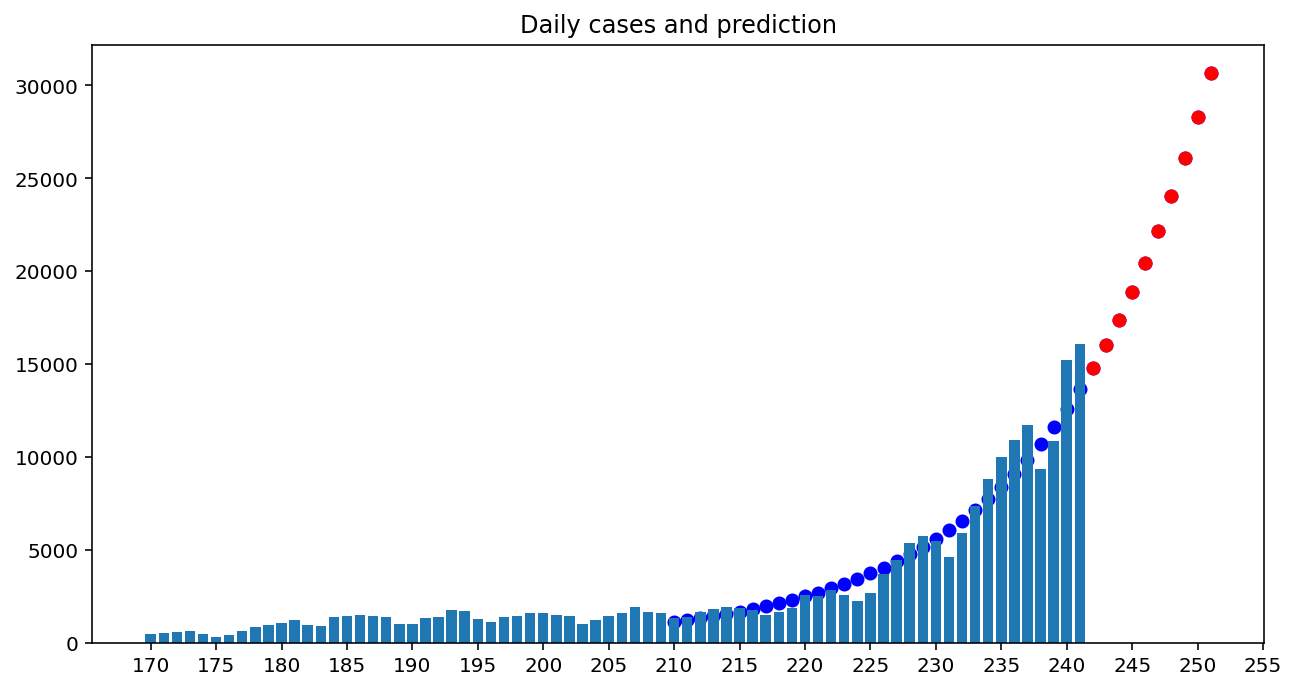

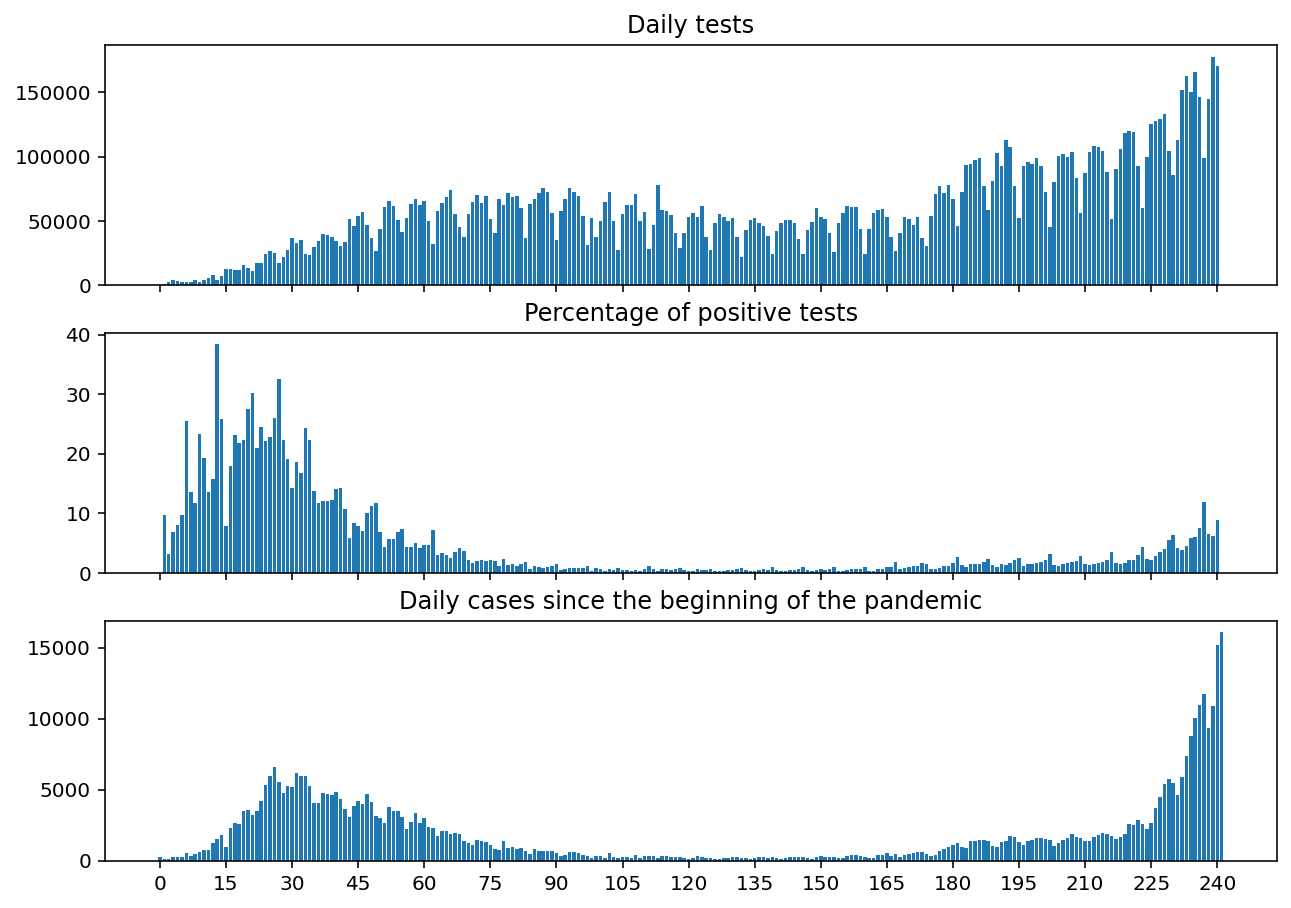

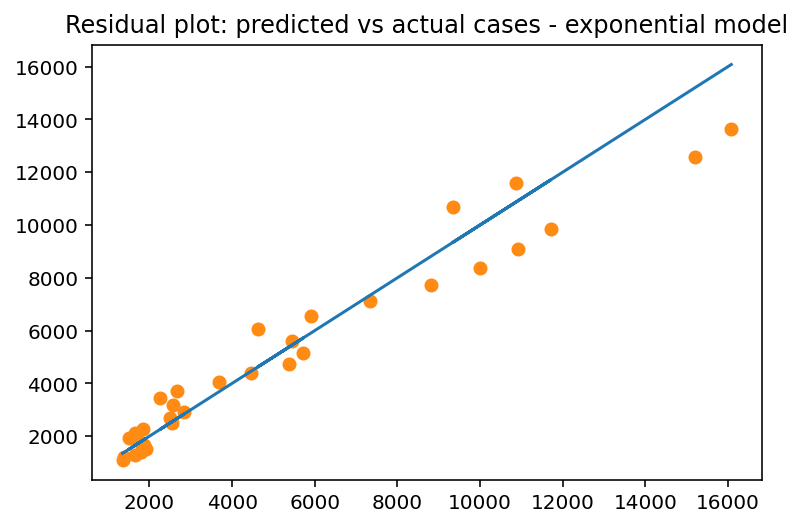

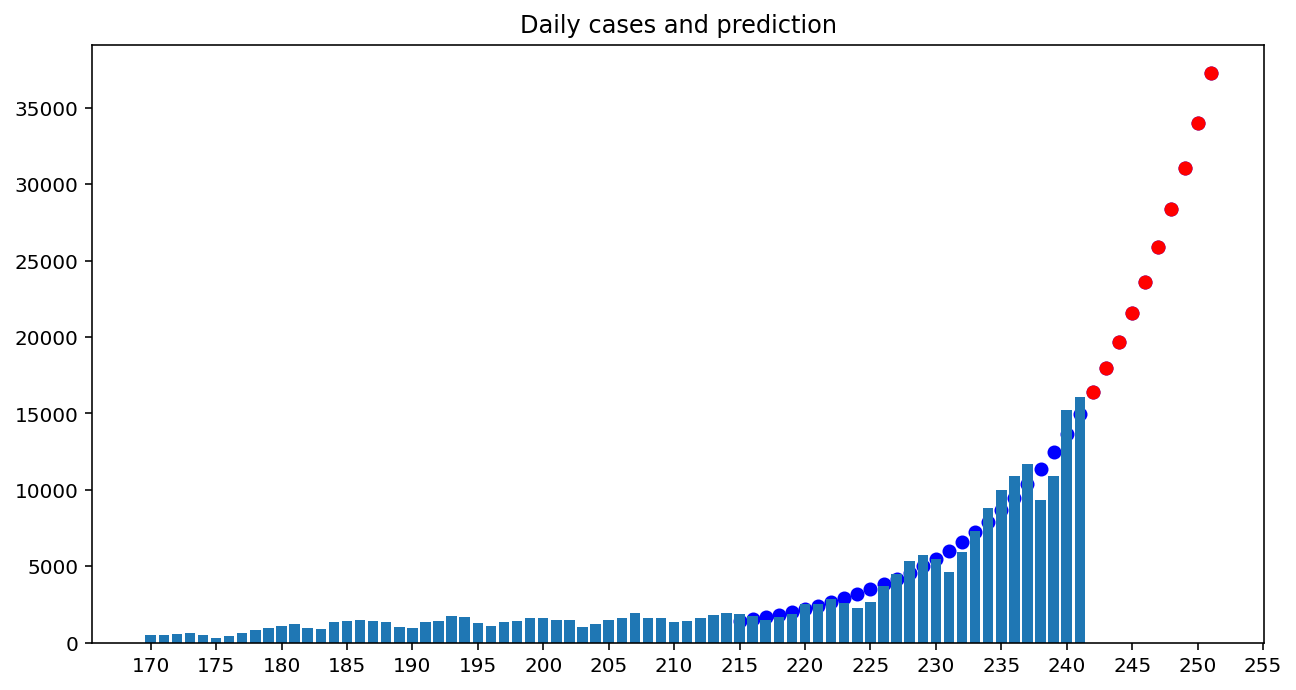

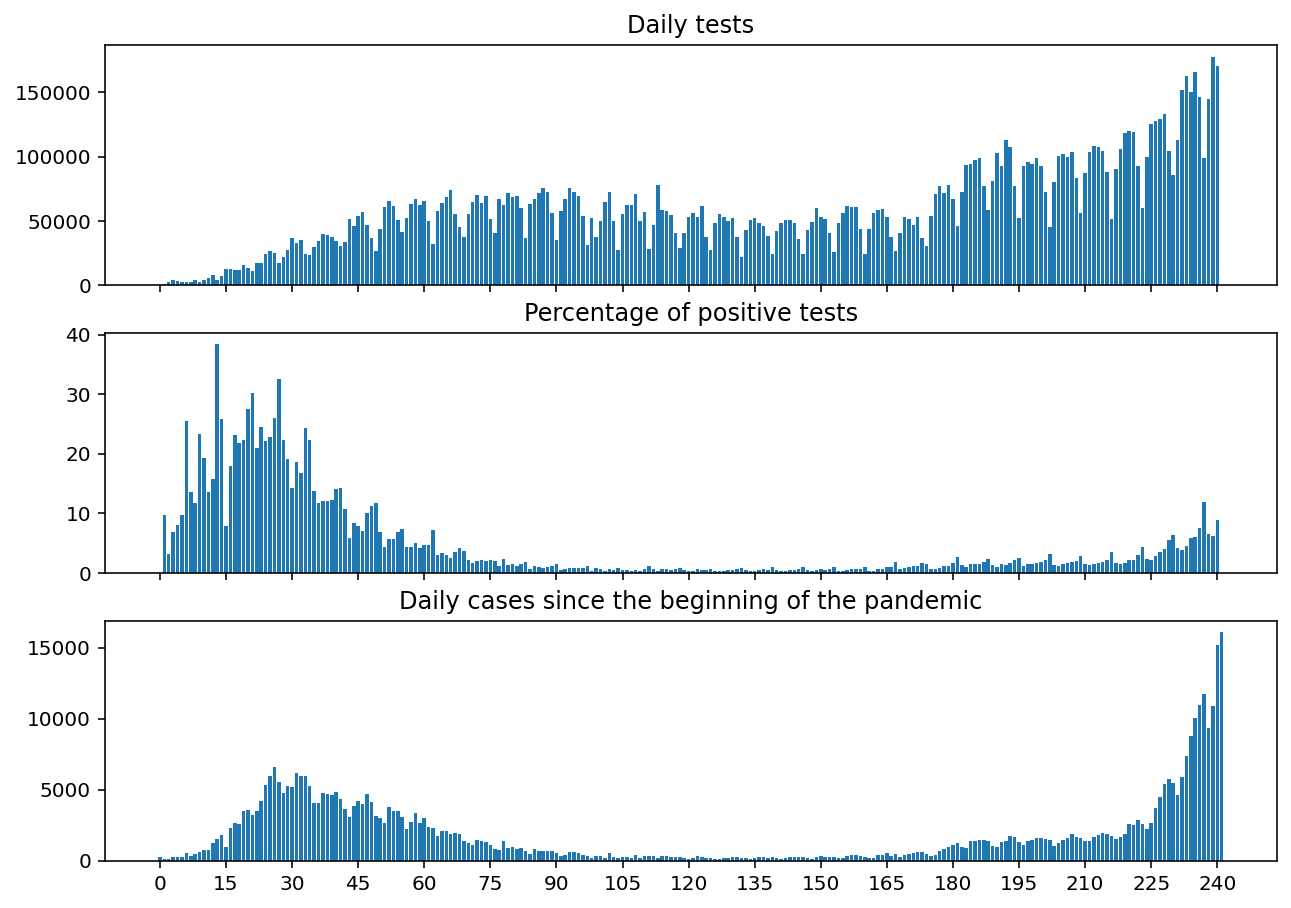

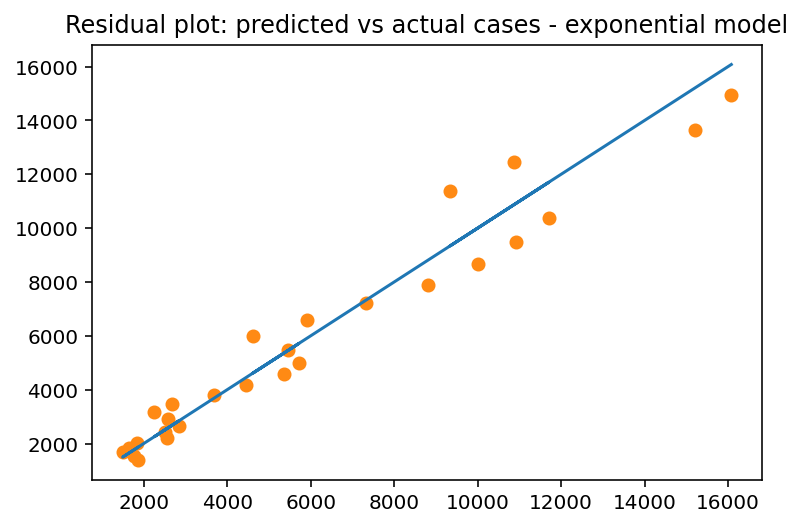

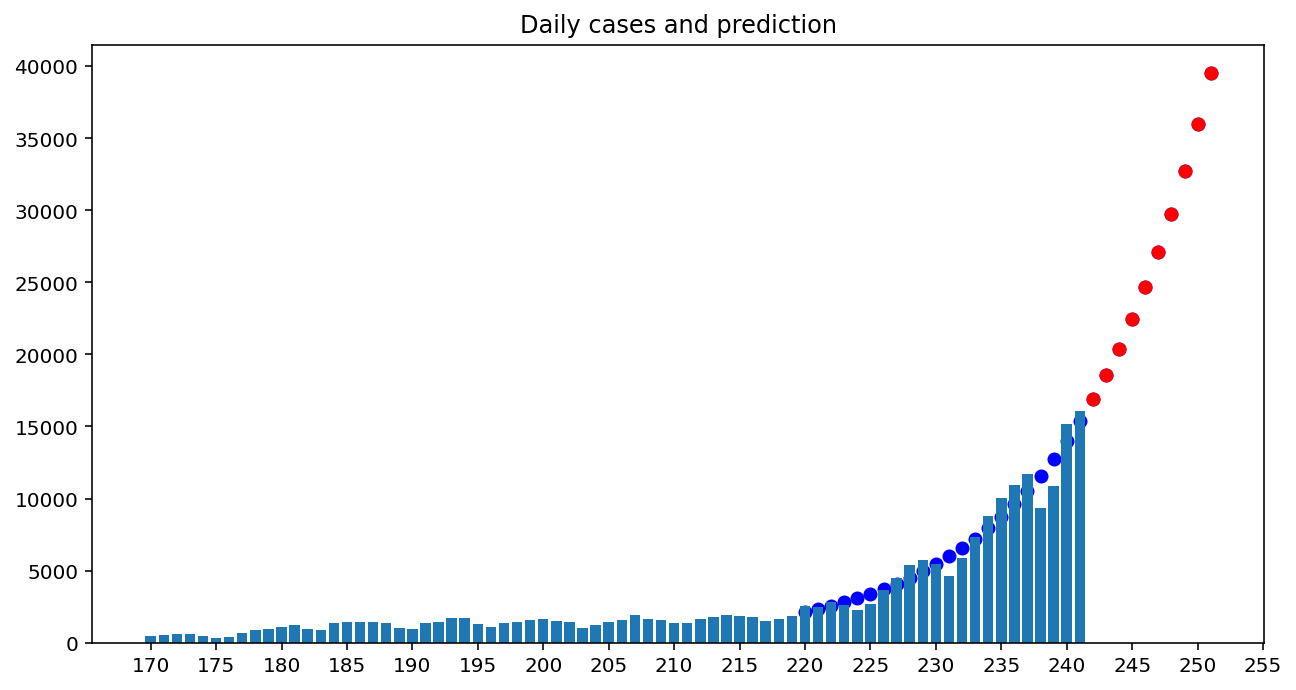

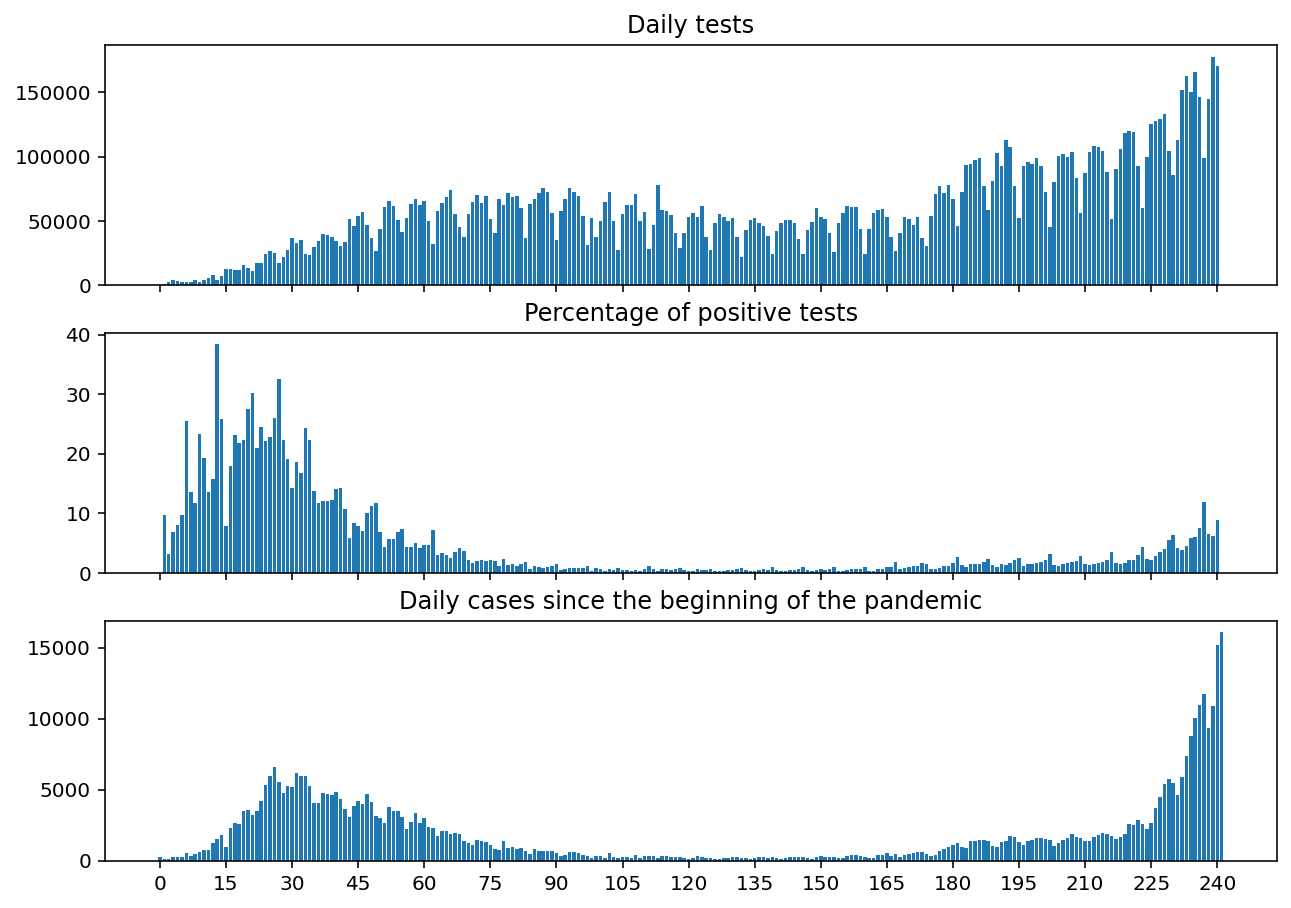

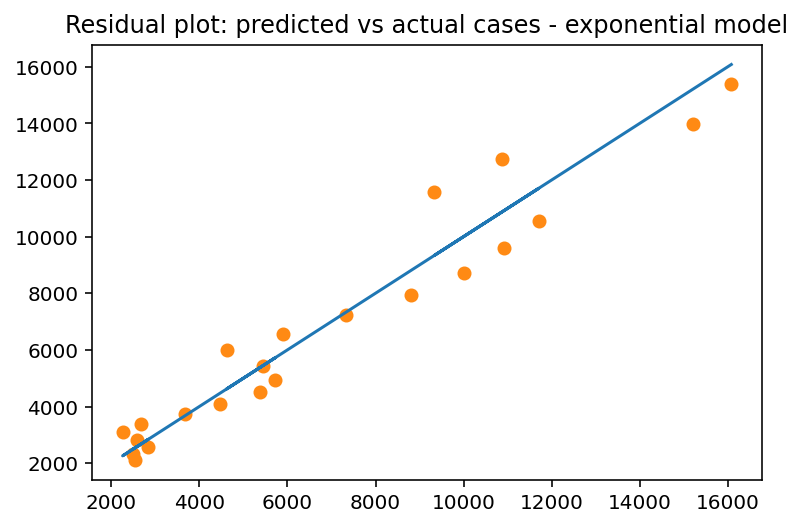

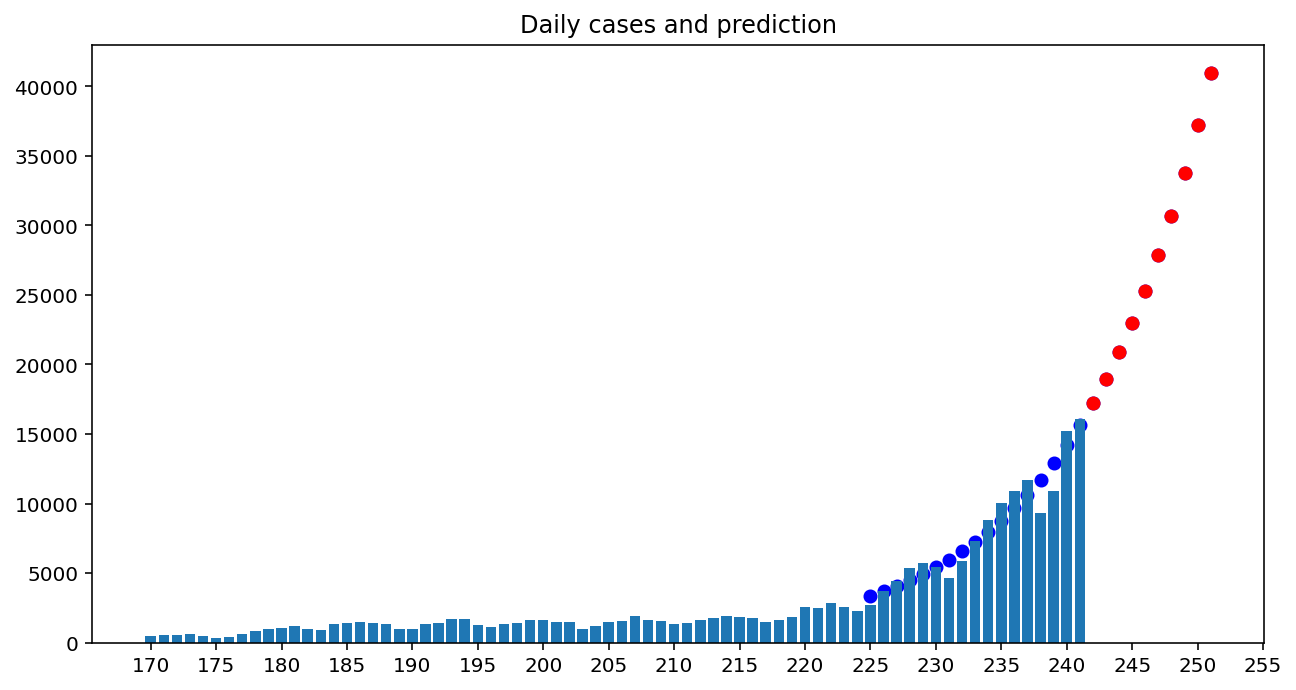

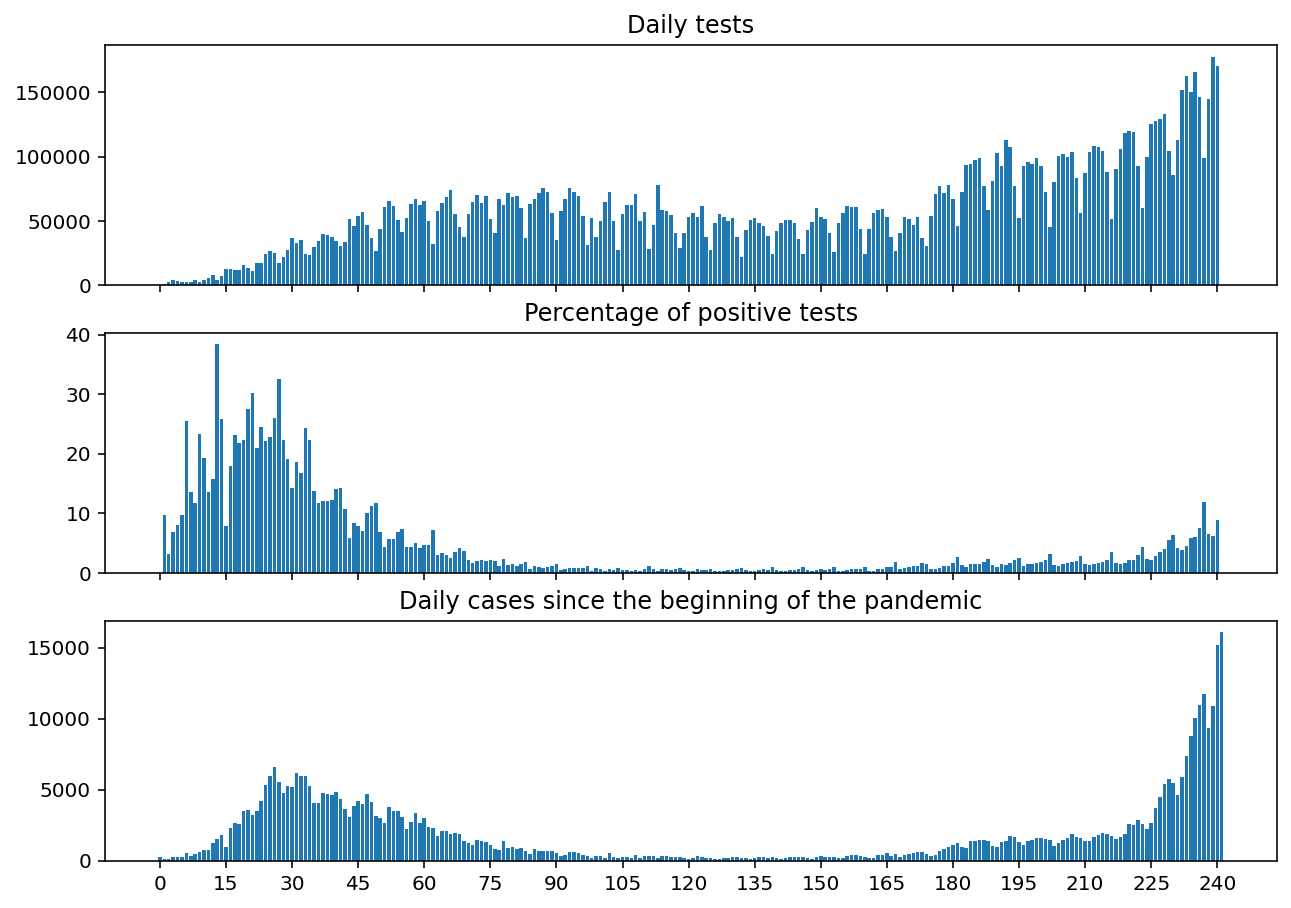

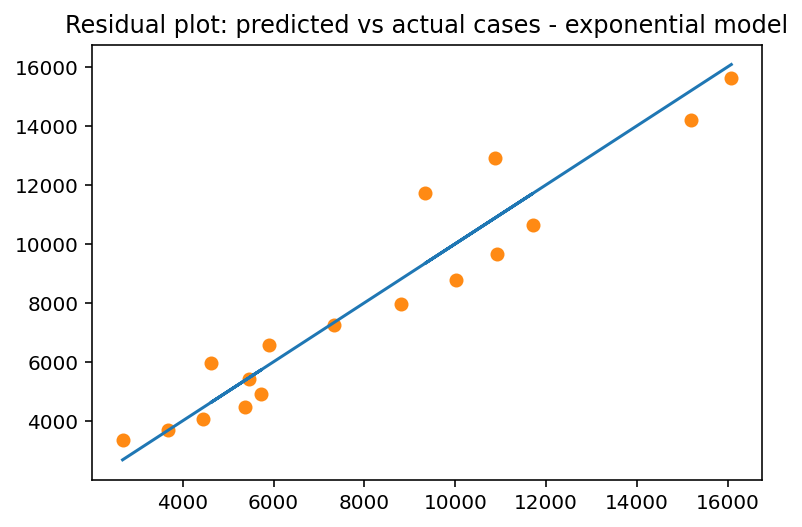

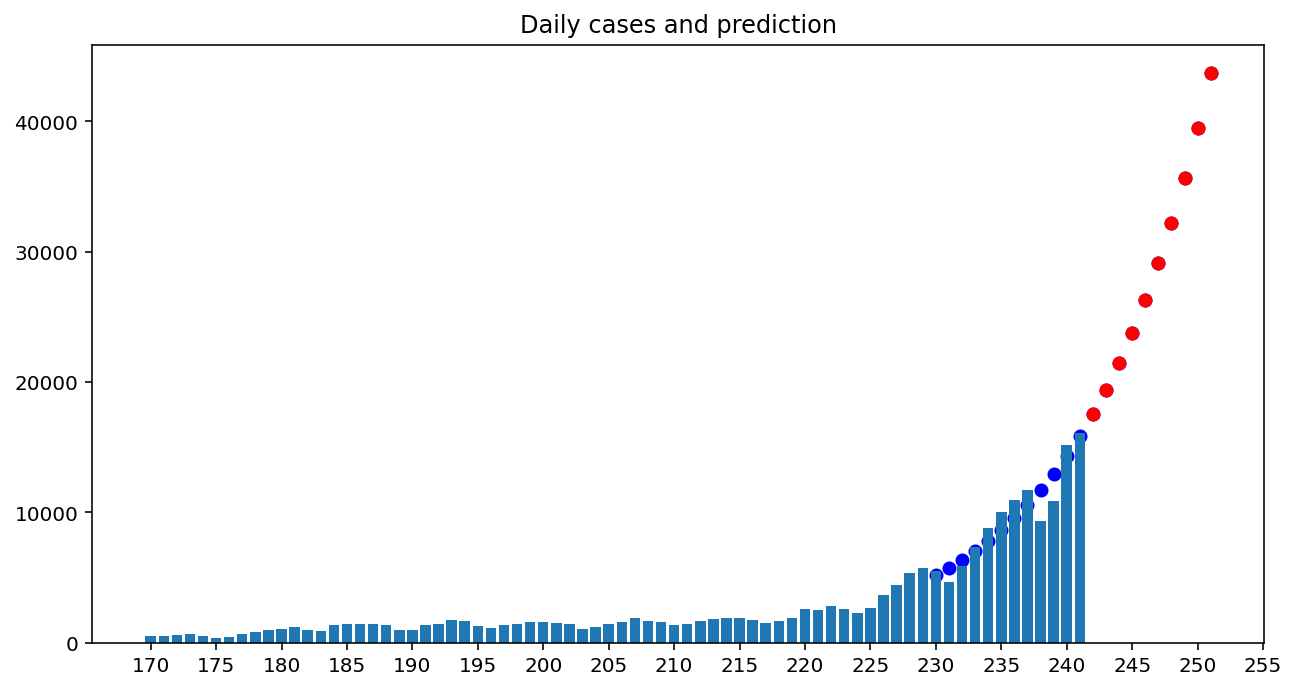

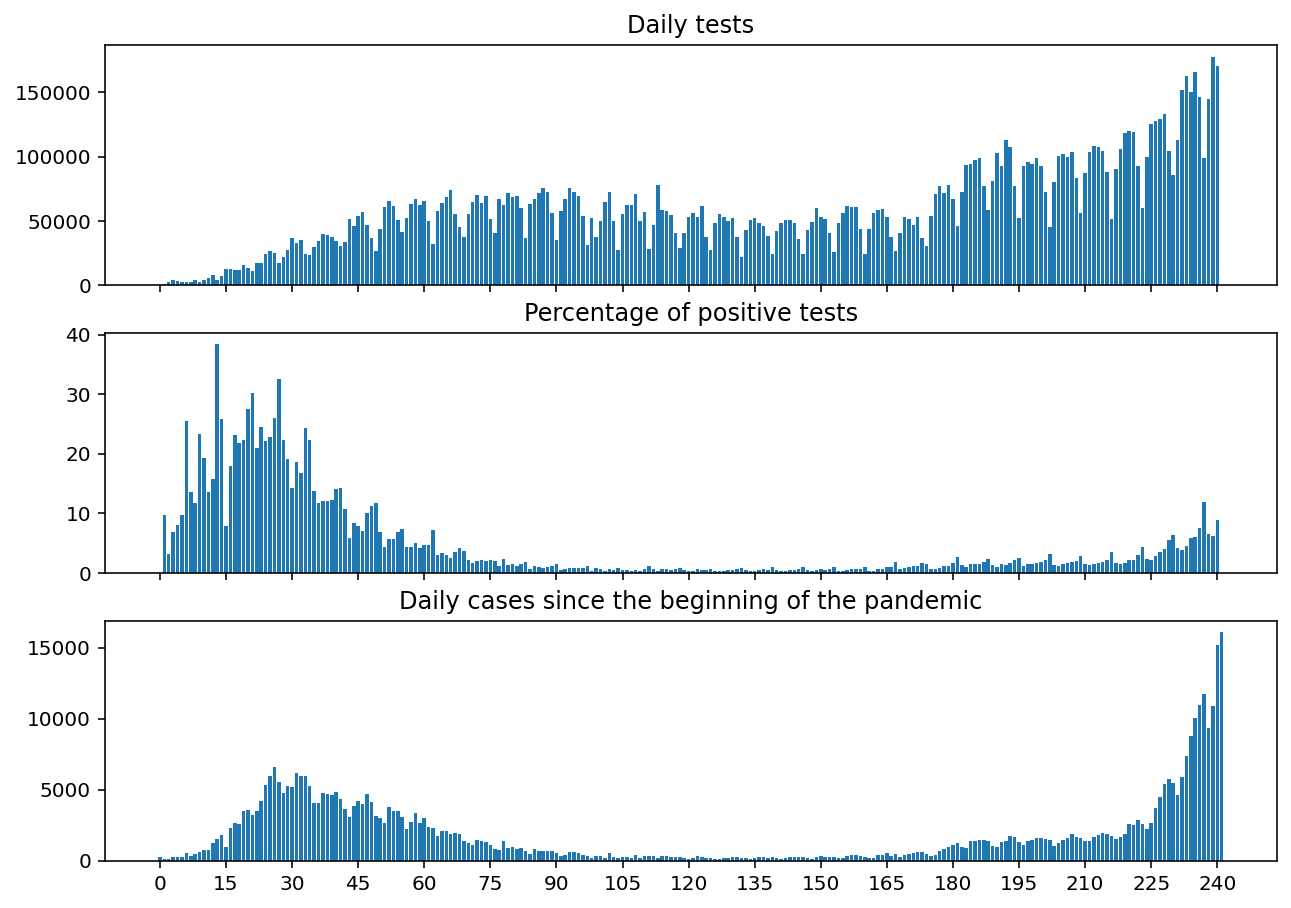

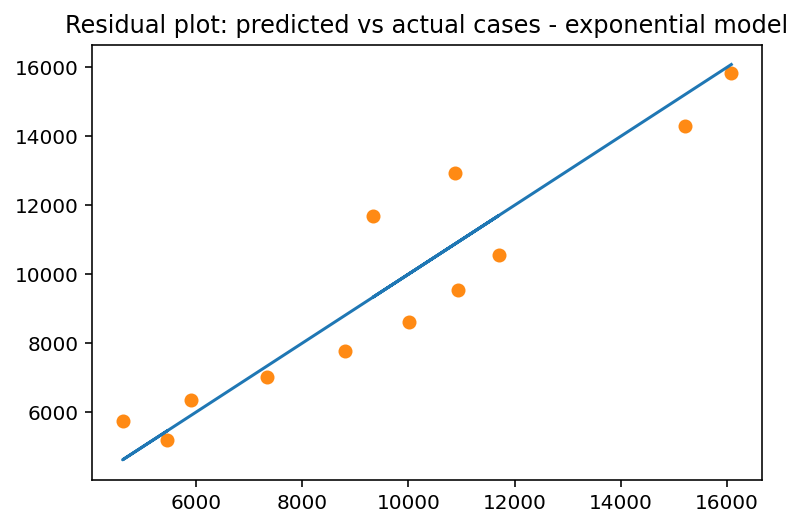

<BarContainer object of 13 artists>

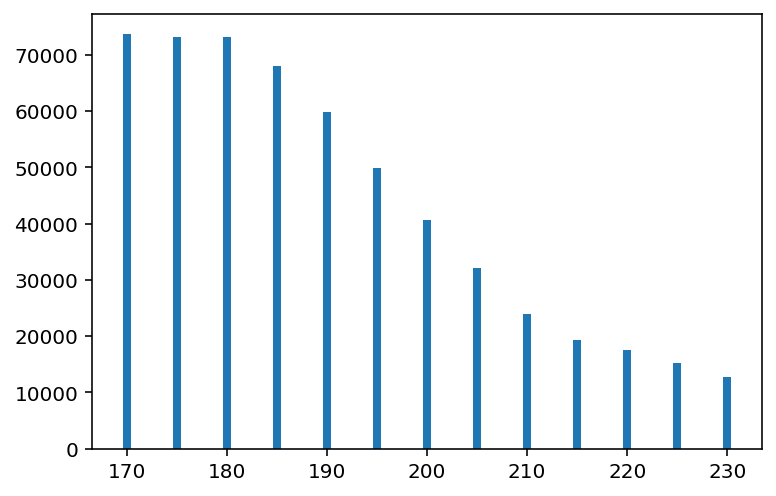

In [71]:
'''Ignore output from this cell,
it is just to find the total error in case estimation, 
by fitting the exponential model of different slices'''

residual_lst=[]
for start in range(170,235,5):
    print(start)
    residual= projections(df,[start,242],10)      
    residual_lst.append(residual)

print(residual_lst)

plt.show()
plt.bar(list(range(170,235,5)),residual_lst)

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_size_inches'

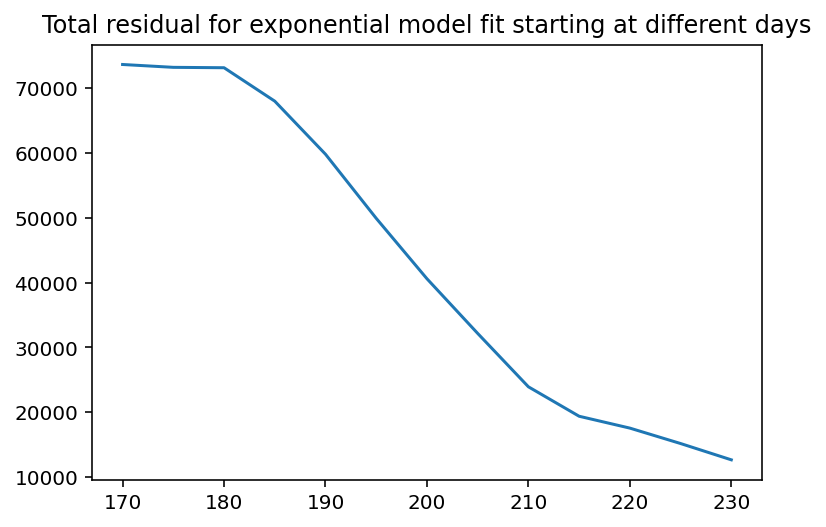

In [85]:
plt.plot(list(range(170,235,5)),residual_lst, )
plt.title("Total residual for exponential model fit starting at different days")
plt.set_size_inches(10.5, 7.5, forward=True)

In [77]:
print(df.iloc[215].data)
print(df.iloc[220].data)

2020-09-26T17:00:00
2020-10-01T17:00:00


### The exponential growth during this second wave of Covid-19, according to this plot, seems to have started at the "elbow" point, between the 26th of September and the 1st of October. 

total error in cases estimation - exponential model: 270662
total error in cases estimation - quadratic model: 296455


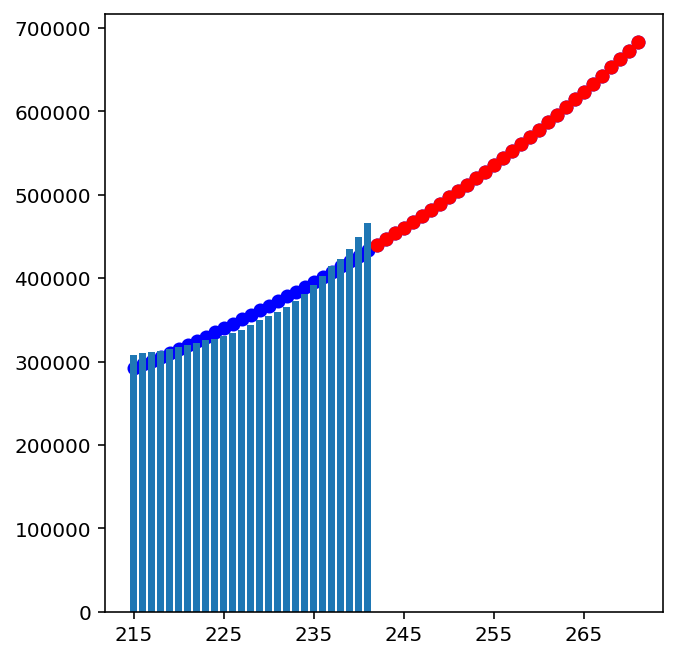

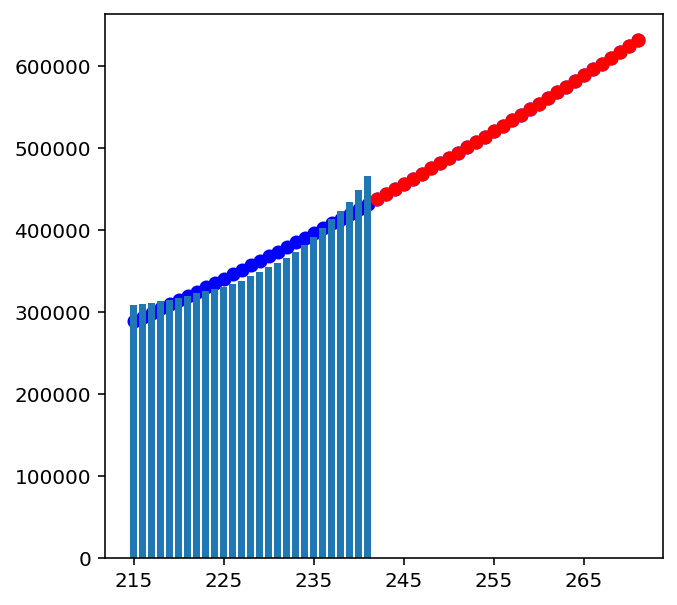

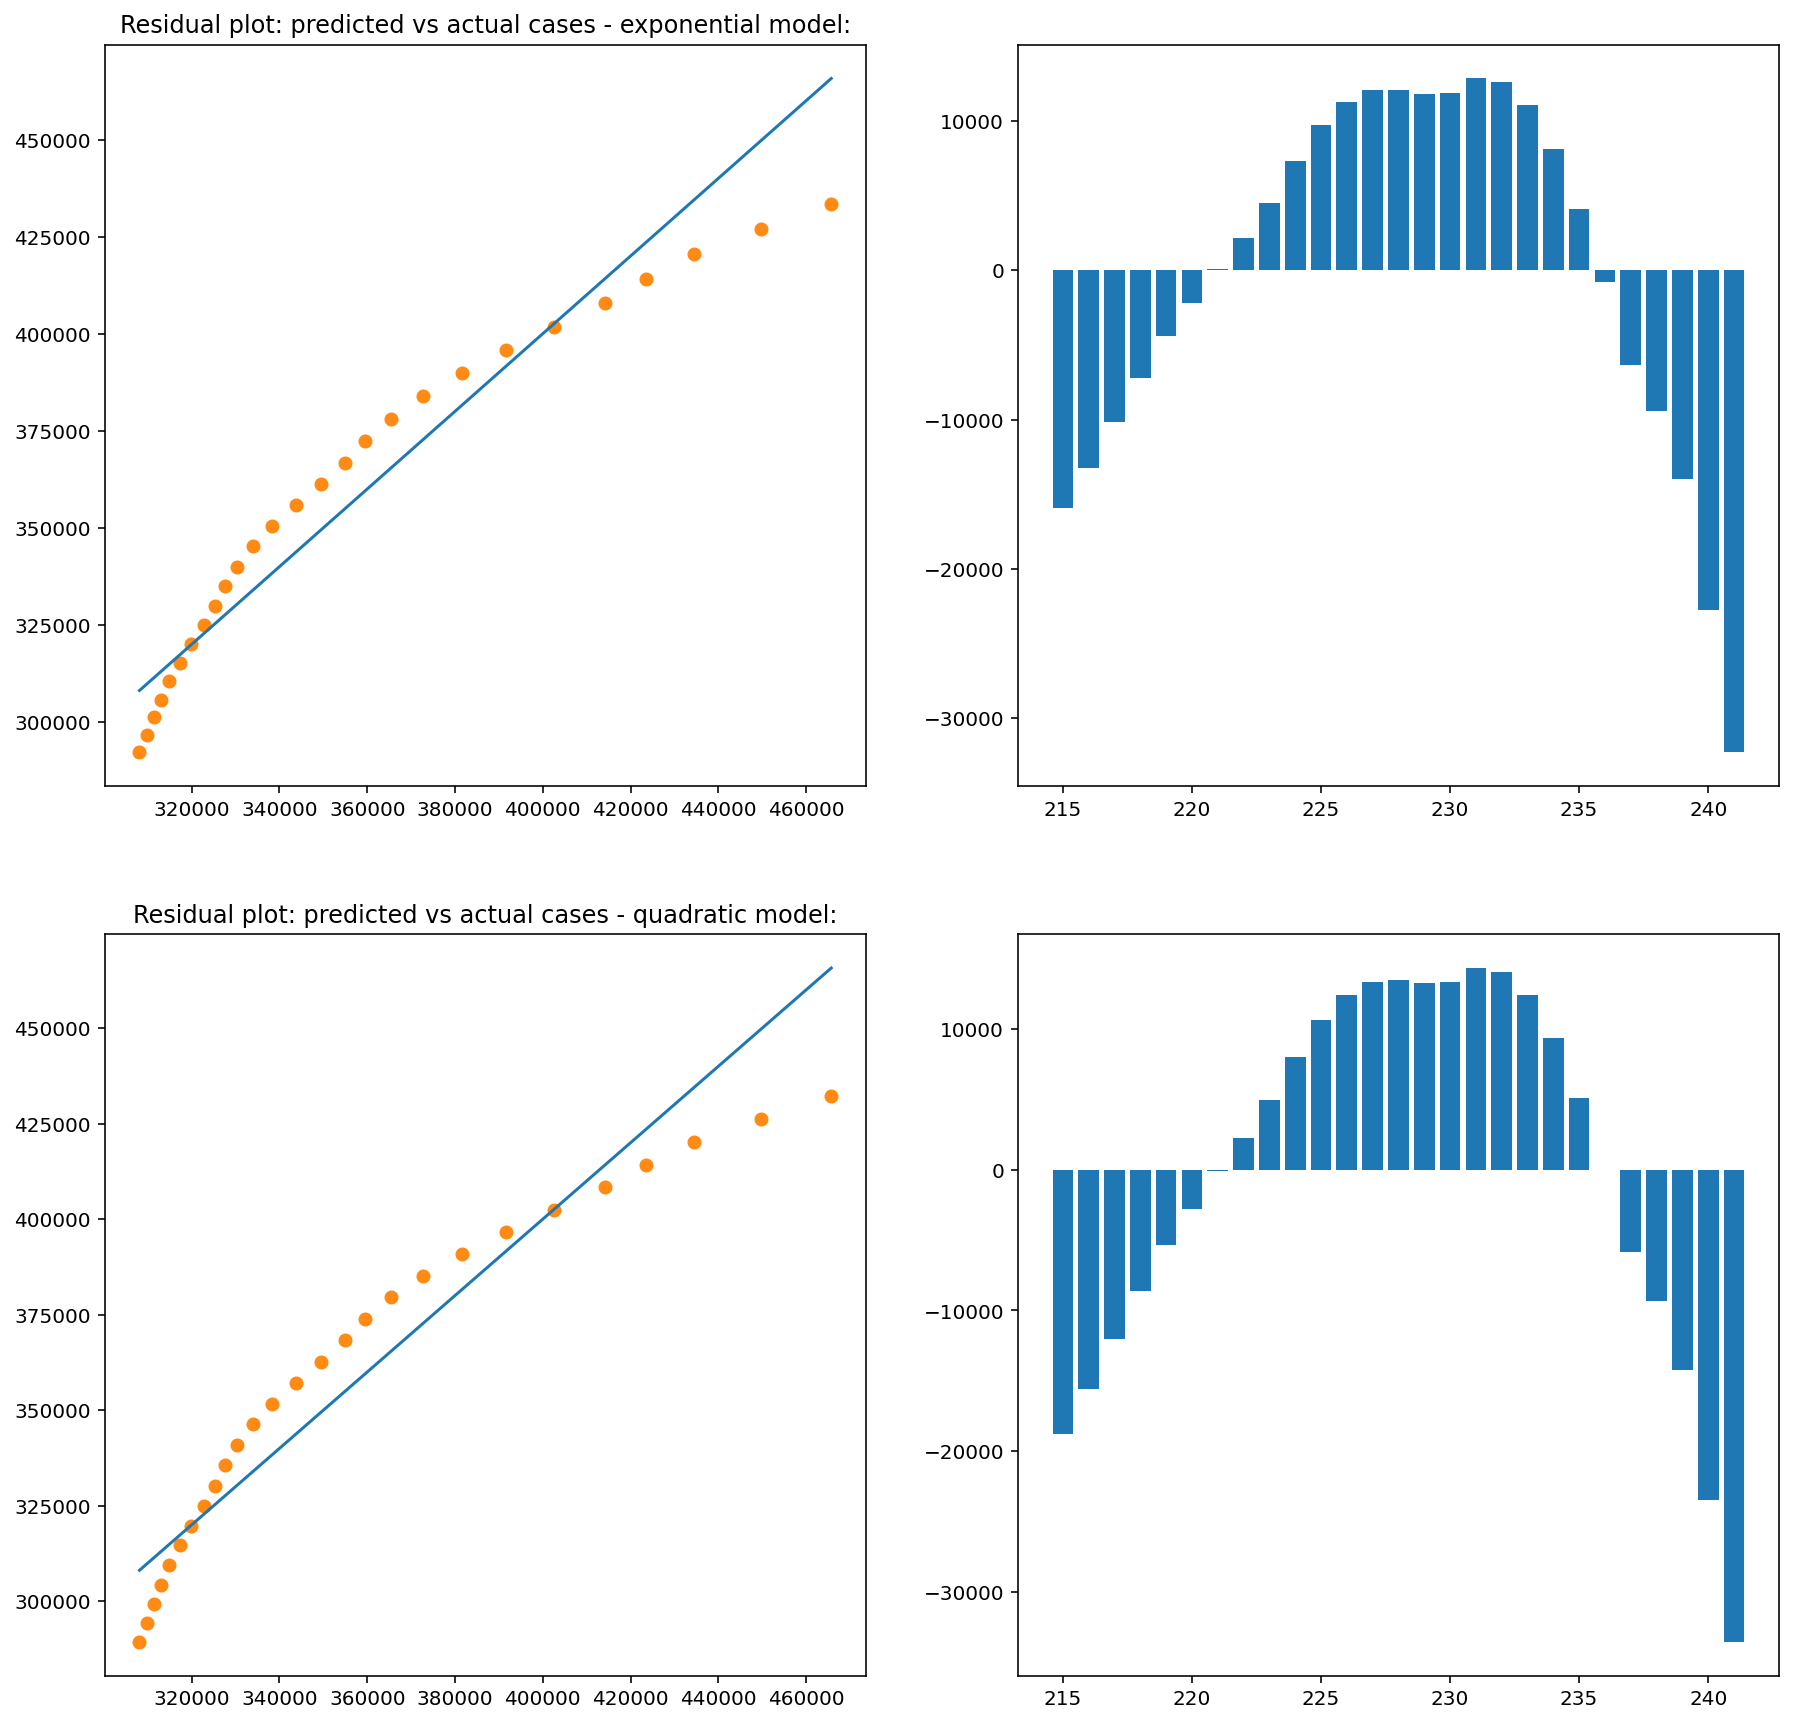

In [80]:
def projections(df,interval, days_pred):   
        
    '''MACHINE LEARNING PART WITH SCI-KIT LEARN '''
    '''MACHINE LEARNING PART WITH SCI-KIT LEARN '''
    Y_train= df.iloc[interval[0]:interval[1]].totale_casi.values 
    Y_train= np.log(Y_train) # to make it "fittable" with linear regression 
    
    Y_train_squared= df.iloc[interval[0]:interval[1]].totale_casi.values 
    Y_train_squared= np.sqrt(df.iloc[interval[0]:interval[1]].totale_casi.values)
    'X used to train:'
    
    X_train=np.array(range(0,interval[1]-interval[0]))
    X_train=X_train.reshape(-1, 1)

    linear1=LinearRegression()
    linear2=LinearRegression()
    model1=linear1.fit(X_train,Y_train) 
    model2=linear2.fit(X_train,Y_train_squared) 
    'X used to predict:'
    
    X_pred= np.array(range(0,interval[1]-interval[0]+days_pred))
    X_pred= X_pred.reshape(-1, 1)
    
    
    'predictions:'
    
    pred= model1.predict(X_pred) 
    
    pred= np.exp(pred) 
    
    pred_squared=model2.predict(X_pred)
    pred_squared= np.square(pred_squared)
    #print(pred)
    #print(pred_squared)
    ''' END OF THE MACHINE LEARNING PART '''
    ''' END OF THE MACHINE LEARNING PART '''
    
    fig, ax1 = plt.subplots(1, )
    
    fig.set_size_inches(5, 5.5, forward=True)
    
    ax1.bar(np.array(range(interval[0],interval[1])),df.totale_casi[interval[0]:interval[1]]  )
    ax1.set_xticks(range(interval[0],interval[1]+days_pred,10))
    #ax1.plot(np.array(range(170,190)),np.square(np.array(range(170,190))*1.36), color="red")
    ax1.scatter(np.array(range(interval[0],interval[1]+days_pred)),pred ,color='blue')
    ax1.scatter(np.array(range(interval[1],interval[1]+days_pred)),pred[interval[1]-interval[0]:] ,color='red')
    
    
    fig, ax1 = plt.subplots(1, )
    
    fig.set_size_inches(5, 5, forward=True)
    
    ax1.bar(np.array(range(interval[0],interval[1])),df.totale_casi[interval[0]:interval[1]]  )
    ax1.set_xticks(range(interval[0],interval[1]+days_pred,10))
    #ax1.plot(np.array(range(170,190)),np.square(np.array(range(170,190))*1.36), color="red")
    ax1.scatter(np.array(range(interval[0],interval[1]+days_pred)),pred_squared ,color='blue')
    ax1.scatter(np.array(range(interval[1],interval[1]+days_pred)),pred_squared[interval[1]-interval[0]:] ,color='red')
    
    
    
    
    residual1= pred[:interval[1]-interval[0]] - df.totale_casi[interval[0]:interval[1]]
    residual2= pred_squared[:interval[1]-interval[0]] - df.totale_casi[interval[0]:interval[1]]
    
    tot_res1=np.absolute(residual1)
    tot_res2=np.absolute(residual2)
    tot_res1=np.sum(tot_res1)
    tot_res2=np.sum(tot_res2)
    
    fig, ((ax1,ax3), (ax2,ax4)) = plt.subplots(2,2)
    fig.set_size_inches(15, 15, forward=True)
    #ax2.scatter(np.array(range(interval[0],interval[1])),residual, color='#ff8a14')
    
    ax1.scatter(df.totale_casi[interval[0]:interval[1]],pred[:interval[1]-interval[0]], color='#ff8a14')
    ax1.plot(df.totale_casi[interval[0]:interval[1]],df.totale_casi[interval[0]:interval[1]])
    ax1.title.set_text('Residual plot: predicted vs actual cases - exponential model:')
    ax2.scatter(df.totale_casi[interval[0]:interval[1]],pred_squared[:interval[1]-interval[0]], color='#ff8a14')
    ax2.plot(df.totale_casi[interval[0]:interval[1]],df.totale_casi[interval[0]:interval[1]])
    ax2.title.set_text('Residual plot: predicted vs actual cases - quadratic model:')
    ax3.bar(np.array(range(interval[0],interval[1])),residual1)
    ax4.bar(np.array(range(interval[0],interval[1])),residual2)
    
    print("total error in cases estimation - exponential model: {0:.0f}".format(tot_res1))
    print("total error in cases estimation - quadratic model: {0:.0f}".format(tot_res2))
    
projections(df,[215,242],30) 
